# CREDIT EDA CASE STUDY

In this case study, we perform EDA to a real business scenario - Credit Risk Analysis. This case study helps to develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. 
When such a company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. 

Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

### Aim

This case study aims at identifying patterns in the data and the driver variables which indicate whether a person may default on the loan or is capable of repaying the loan. This will ensure that risky customers are not approved the loan and the customers capable of repaying the loan are not rejected.

### Flow of analysis

**1. Import the required libraries** <br>
**2. Create the dataframes using application_data.csv and previous_application.csv files** <br>
**3. Data Cleaning**<br>
**4. Analysing the Null or Missing values**<br>
**5. Fixing Rows and Columns**<br>
**6. Identifying Outliers**<br>
**7. Standardizing Values**<br>
**8. Check for imbalance in the data**<br>
**9. Univariate Analysis**<br>
**10. Segmented Univariate Analysis**<br>
**11. Bivariate Analysis**<br>
**12. Multivariate Analysis**<br>
**13. Merging Application Data and Previous Application DF's**<br>
**14. Top 10 Correlations**

## Let us begin the EDA

### 1. Import the required libraries

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools
import time
%matplotlib inline

In [2]:
# Excluding unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Adjusting the display to fit rows and columns effectively
start_time = time.time()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

---

### 2. Create the dataframes using application_data.csv and previous_application.csv files

In [4]:
#Creating a Dataframe "adDF" and loading the "application_data" dataset
adDF = pd.read_csv("D:\\PGD DS IIITB\\Python - Upgrad Oct 2020\\Credit EDA Case Study\\application_data.csv")

In [5]:
#Creating a Dataframe "paDF" and loading the "previous_application" dataset
paDF = pd.read_csv("D:\\PGD DS IIITB\\Python - Upgrad Oct 2020\\Credit EDA Case Study\\previous_application.csv")

In [6]:
#Listing the top 5 rows from the "adDF" to check if the dataset is correctly loaded into the Dataframe
adDF.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           NaN      0.555912      0.729567             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN   
3      100006       0         Cash loans           F           

In [7]:
#Listing the top 5 rows from the "paDF" to check if the dataset is correctly loaded into the Dataframe
paDF.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [8]:
#Analysing the numeric variables in the "adDF"
adDF.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   
mean   278180.518577       0.080729       0.417052      1.687979e+05  5.990260e+05   27108.573909     5.383962e+05                    0.020868  -16036.995067   63815.045904       -4986.120328     -2994.202373      12.061091       0.999997        0.819889         0.199368          0.998133       0.281066       0.056720         2.152665              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659                0.078173                0.230454                 0.179555       0.502130  5.143927e-01       0.510853         0.11744          0.088442                     0.977735         0.752471        0.044621       0.078942       0.149725       0.226282       0.231894       0.066333              0.100775        0.107399                 0.008809           0.028358         0.114231           0.087543                      0.977065          0.759637         0.042553        0.074490   
std    102790.175348       0.272419       0.722121      2.371231e+05  4.024908e+05   14493.737315     3.694465e+05                    0.013831    4363.988632  141275.766519        3522.886321      1509.450419      11.944812       0.001803        0.384280         0.399526          0.043164       0.449521       0.231307         0.910682              0.509034                     0.502737                 3.265832                    0.122126                    0.219526                     0.197499                0.268444                0.421124                 0.383817       0.211062  1.910602e-01       0.194844         0.10824          0.082438                     0.059223         0.113280        0.076036       0.134576       0.100049       0.144641       0.161380       0.081184              0.092576        0.110565                 0.047732           0.069523         0.107936           0.084307                      0.064575          0.110111         0.074445        0.132256   
min    100002.000000       0.000000       0.000000      2.

In [9]:
#Analysing the numeric variables in the "paDF"
paDF.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05             1.248418e+01            9.964675e-01           0.079637               0.188357                  0.773503  -8.806797e+02      3.139511e+02  1.605408e+01       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05             3.334028e+00            5.932963e-02           0.107823               0.087671                  0.100879   7.790997e+02      7.127443e+03  1.456729e+01        88916.115834    72444.869708              106857.034789  149647.415123     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034781                  0.373150  -2.922000e+03     -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160716                  0.715645  -1.300000e+03     -1.000000e+00  6.000000e+00       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189122                  0.835095  -5.810000e+02      3.000000e+00  1.200000e+01       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108909               0.193330                  0.852537  -2.800000e+02      8.200000e+01  2.400000e+01       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

In [10]:
# Analyse the columns and their datatypes for "adDF"
adDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [11]:
# Analyse the columns and their datatypes for "paDF"
paDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [12]:
#Let's inspect the "adDF" Dimension and Size
print("Dimension - adDF : ", adDF.shape)
print("Size      - adDF : ", adDF.size)

Dimension - adDF :  (307511, 122)
Size      - adDF :  37516342


In [13]:
#Let's inspect the "paDF" Dimension and Size
print("Dimension - paDF : ", paDF.shape)
print("Size      - paDF : ", paDF.size)

Dimension - paDF :  (1670214, 37)
Size      - paDF :  61797918


---

### 3. Data Cleaning

#### 3.1 Column wise Null or Missing check

In [14]:
#column wise null or missing check or sorting them in ascending order - adDF
adDF.isnull().sum().sort_values()

SK_ID_CURR                           0
HOUR_APPR_PROCESS_START              0
REG_REGION_NOT_WORK_REGION           0
LIVE_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY               0
REG_CITY_NOT_WORK_CITY               0
LIVE_CITY_NOT_WORK_CITY              0
ORGANIZATION_TYPE                    0
FLAG_DOCUMENT_21                     0
FLAG_DOCUMENT_20                     0
FLAG_DOCUMENT_19                     0
FLAG_DOCUMENT_18                     0
FLAG_DOCUMENT_17                     0
FLAG_DOCUMENT_16                     0
FLAG_DOCUMENT_15                     0
FLAG_DOCUMENT_14                     0
FLAG_DOCUMENT_13                     0
FLAG_DOCUMENT_12                     0
FLAG_DOCUMENT_11                     0
FLAG_DOCUMENT_10                     0
FLAG_DOCUMENT_9                      0
FLAG_DOCUMENT_8                      0
FLAG_DOCUMENT_7                      0
FLAG_DOCUMENT_6                      0
FLAG_DOCUMENT_5                      0
FLAG_DOCUMENT_4          

In [15]:
#column wise null or missing check or sorting them in ascending order - paDF
paDF.isnull().sum().sort_values()

SK_ID_PREV                           0
NAME_YIELD_GROUP                     0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
NAME_PORTFOLIO                       0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON                   0
DAYS_DECISION                        0
NAME_CONTRACT_STATUS                 0
NAME_CASH_LOAN_PURPOSE               0
NAME_PAYMENT_TYPE                    0
AMT_APPLICATION                      0
NFLAG_LAST_APPL_IN_DAY               0
FLAG_LAST_APPL_PER_CONTRACT          0
HOUR_APPR_PROCESS_START              0
WEEKDAY_APPR_PROCESS_START           0
NAME_CONTRACT_TYPE                   0
SK_ID_CURR                           0
AMT_CREDIT                           1
PRODUCT_COMBINATION                346
CNT_PAYMENT                     372230
AMT_ANNUITY                     372235
AMT_GOODS_PRICE          

#### 3.2 Computing Null or Missing value percentage

In [16]:
# Checking the % of null or missing values in each column - "adDF"
round(adDF.isnull().mean() * 100,2).sort_values()

SK_ID_CURR                       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_WORK_REGION       0.00
LIVE_REGION_NOT_WORK_REGION      0.00
REG_CITY_NOT_LIVE_CITY           0.00
REG_CITY_NOT_WORK_CITY           0.00
LIVE_CITY_NOT_WORK_CITY          0.00
ORGANIZATION_TYPE                0.00
FLAG_DOCUMENT_21                 0.00
FLAG_DOCUMENT_20                 0.00
FLAG_DOCUMENT_19                 0.00
FLAG_DOCUMENT_18                 0.00
FLAG_DOCUMENT_17                 0.00
FLAG_DOCUMENT_16                 0.00
WEEKDAY_APPR_PROCESS_START       0.00
FLAG_DOCUMENT_15                 0.00
FLAG_DOCUMENT_13                 0.00
FLAG_DOCUMENT_12                 0.00
FLAG_DOCUMENT_11                 0.00
FLAG_DOCUMENT_10                 0.00
FLAG_DOCUMENT_9                  0.00
FLAG_DOCUMENT_8                  0.00
FLAG_DOCUMENT_7                  0.00
FLAG_DOCUMENT_6                  0.00
FLAG_DOCUMENT_5                  0.00
FLAG_DOCUMENT_4                  0.00
FLAG_DOCUMEN

In [17]:
# Checking the % of null or missing values in each column - "paDF"
round(paDF.isnull().mean() * 100,2).sort_values()

SK_ID_PREV                      0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_PAYMENT_TYPE               0.00
AMT_APPLICATION                 0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_CREDIT                      0.00
NAME_CONTRACT_TYPE              0.00
SK_ID_CURR                      0.00
PRODUCT_COMBINATION             0.02
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
AMT_GOODS_PRICE                23.08
DAYS_LAST_DUE                  40.30
D

#### 3.2.1 Graphical Representation of Null or Missing % 

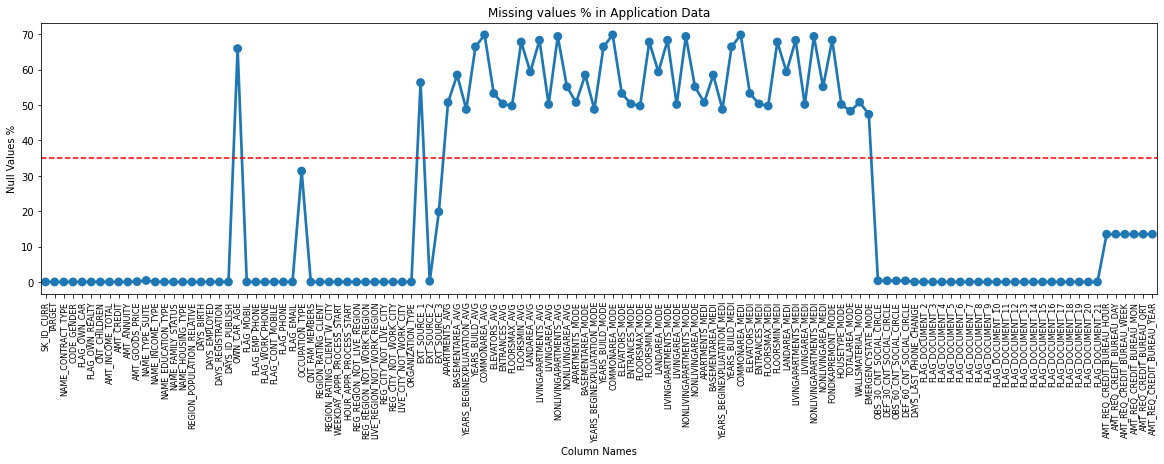

In [18]:
#Let's plot a point plot to check the missing value threshold and its %
adDF_null = pd.DataFrame(round(adDF.isnull().mean() * 100,2)).reset_index()
adDF_null.columns = ['Column_Name','Null%']
adDF_fig = plt.figure(figsize=(20,5))
ax = sns.pointplot(x='Column_Name', y='Null%',data=adDF_null)
plt.xticks(rotation =90,fontsize =8)
ax.axhline(35, ls='--',color='red')
plt.title("Missing values % in Application Data")
plt.ylabel("Null Values %")
plt.xlabel("Column Names")
plt.show()

#### Interpretation:
From the above pointplot we can see that we have a percentage of Null Values is above 35%, which is above the red line.

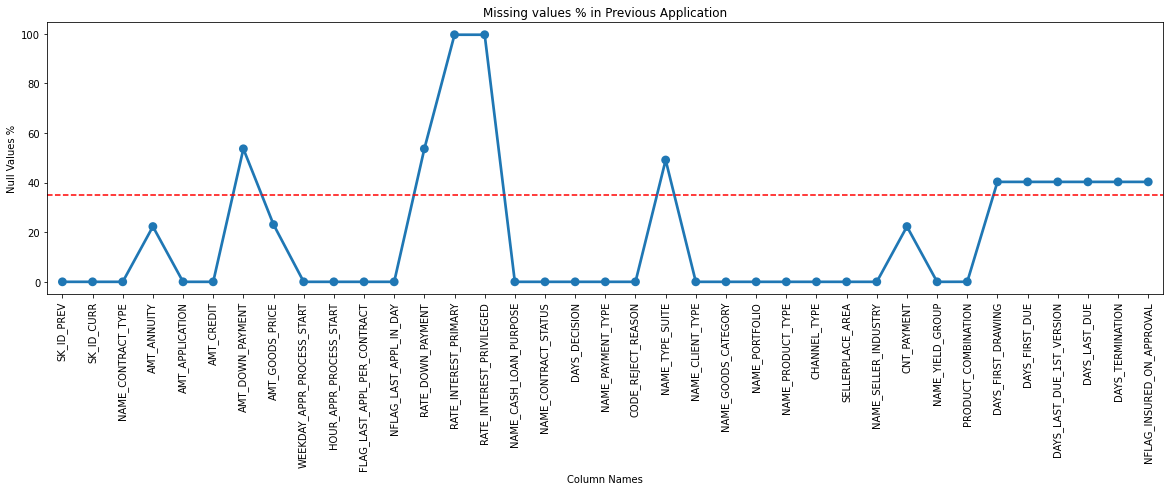

In [19]:
#Let's plot a point plot to check the missing value threshold and its %
paDF_null = pd.DataFrame(round(paDF.isnull().mean() * 100,2)).reset_index()
paDF_null.columns = ['Column_Name','Null%']
paDF_fig = plt.figure(figsize=(20,5))
ax = sns.pointplot(x='Column_Name', y='Null%',data=paDF_null)
plt.xticks(rotation =90,fontsize =10)
ax.axhline(35, ls='--',color='red')
plt.title("Missing values % in Previous Application")
plt.ylabel("Null Values %")
plt.xlabel("Column Names")
plt.show()

#### Interpretation:
From the above pointplot we can see that we have a percentage of Null Values is above 35%, which is above the red line.

#### 3.3 Segregating Columns with more than 35% Null or Missing Values

In [20]:
# Let's drill down into the 35% of Null Values in the "null35_adDF" 
null35_adDF = adDF_null[adDF_null['Null%'] >= 35]
null35_adDF.sort_values(by='Column_Name',axis=0,ascending=True)

Column_Name  Null%
44                APARTMENTS_AVG  50.75
72               APARTMENTS_MEDI  50.75
58               APARTMENTS_MODE  50.75
45              BASEMENTAREA_AVG  58.52
73             BASEMENTAREA_MEDI  58.52
59             BASEMENTAREA_MODE  58.52
48                COMMONAREA_AVG  69.87
76               COMMONAREA_MEDI  69.87
62               COMMONAREA_MODE  69.87
49                 ELEVATORS_AVG  53.30
77                ELEVATORS_MEDI  53.30
63                ELEVATORS_MODE  53.30
90           EMERGENCYSTATE_MODE  47.40
50                 ENTRANCES_AVG  50.35
78                ENTRANCES_MEDI  50.35
64                ENTRANCES_MODE  50.35
41                  EXT_SOURCE_1  56.38
51                 FLOORSMAX_AVG  49.76
79                FLOORSMAX_MEDI  49.76
65                FLOORSMAX_MODE  49.76
52                 FLOORSMIN_AVG  67.85
80                FLOORSMIN_MEDI  67.85
66                FLOORSMIN_MODE  67.85
86            FONDKAPREMONT_MODE  68.39
87                HOUSETYPE_MODE  50.18
53                  LANDAREA_AVG  59.38
81                 LANDAREA_MEDI  59.38
67                 LANDAREA_MODE  59.38
54          LIVINGAPARTMENTS_AVG  68.35
82         LIVINGAPARTMENTS_MEDI  68.35
68         LIVINGAPARTMENTS_MODE  68.35
55                LIVINGAREA_AVG  50.19
83               LIVINGAREA_MEDI  50.19
69               LIVINGAREA_MODE  50.19
56       NONLIVINGAPARTMENTS_AVG  69.43
84      NONLIVINGAPARTMENTS_MEDI  69.43
70      NONLIVINGAPARTMENTS_MODE  69.43
57             NONLIVINGAREA_AVG  55.18
85            NONLIVINGAREA_MEDI  55.18
71            NONLIVINGAREA_MODE  55.18
21                   OWN_CAR_AGE  65.99
88                TOTALAREA_MODE  48.27
89            WALLSMATERIAL_MODE  50.84
46   YEARS_BEGINEXPLUATATION_AVG  48.78
74  YEARS_BEGINEXPLUATATION_MEDI  48.78
60  YEARS_BEGINEXPLUATATION_MODE  48.78
47               YEARS_BUILD_AVG  66.50
75              YEARS_BUILD_MEDI  66.50
61              YEARS_BUILD_MODE  66.50

In [21]:
#calculating the length of the null data
print('Size of Missing or Null columns : ',len(null35_adDF))

Size of Missing or Null columns :  49


#### Interpretation:
There are a total of 49 columns with Null or Missing % of 35 in Application Data Dataset. In the next steps we will analyse these 49 columns before dropping them

In [22]:
# Let's drill down into the 35% of Null Values in the "null35_paDF" 
null35_paDF = paDF_null[paDF_null['Null%'] >= 35]
null35_paDF.sort_values(by='Column_Name',axis=0,ascending=True)

Column_Name  Null%
6            AMT_DOWN_PAYMENT  53.64
31         DAYS_FIRST_DRAWING  40.30
32             DAYS_FIRST_DUE  40.30
34              DAYS_LAST_DUE  40.30
33  DAYS_LAST_DUE_1ST_VERSION  40.30
35           DAYS_TERMINATION  40.30
20            NAME_TYPE_SUITE  49.12
36  NFLAG_INSURED_ON_APPROVAL  40.30
12          RATE_DOWN_PAYMENT  53.64
13      RATE_INTEREST_PRIMARY  99.64
14   RATE_INTEREST_PRIVILEGED  99.64

In [23]:
#calculating the length of the null data
print('Size of Missing or Null columns : ',len(null35_paDF))

Size of Missing or Null columns :  11


#### Interpretation:
There are a total of 11 columns with Null or Missing % of 35 in Previous Application Dataset. In the next steps we will analyse these 11 columns before dropping them

---

### 4. Analysing the Null or Missing values

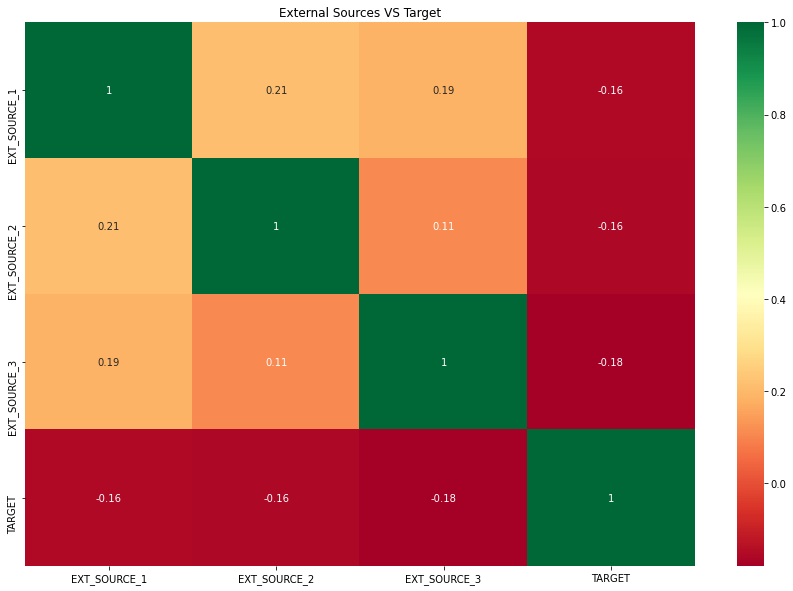

In [24]:
# As a first step lets analyse whether we need the EXT_Source_1, EXT_Source_2, EXT_Source_3 columns
adDF_Ext_Source = adDF[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','TARGET']]
adDF_Ext_Source_corr = adDF_Ext_Source.corr()
adDF_fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(adDF_Ext_Source_corr,
            xticklabels=adDF_Ext_Source_corr.columns,
            yticklabels=adDF_Ext_Source_corr.columns,
            annot = True,
            cmap ="RdYlGn")
ax.set_title('External Sources VS Target')
plt.show()

#### Interpretation:
From the above Heatmap, we see there is no correlation between Target and all 3 External sources and hence can be removed

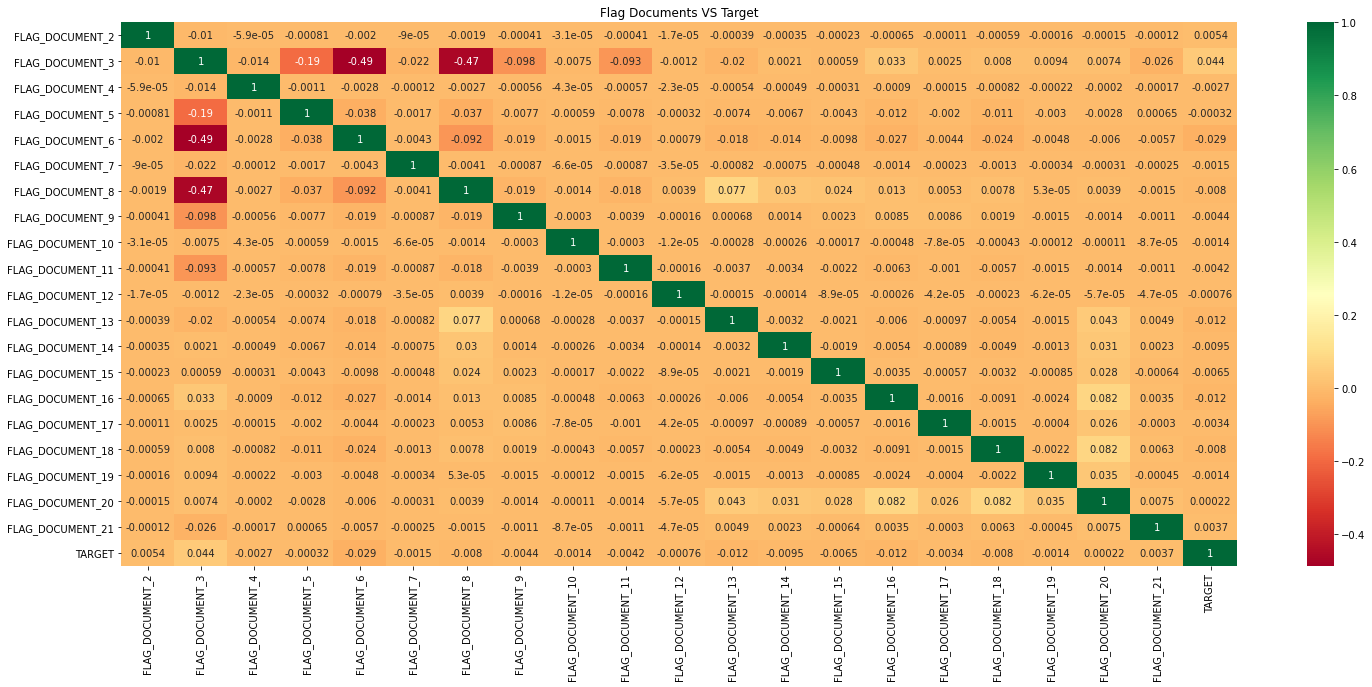

In [25]:
# Next we are going to analyse the Flag Documents
adDF_Flag = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

adDF_Flag_Doc = adDF[adDF_Flag+['TARGET']]
adDF_Flag_corr = adDF_Flag_Doc.corr()
adDF_fig = plt.figure(figsize=(25,10))
ax = sns.heatmap(adDF_Flag_corr,
            xticklabels=adDF_Flag_corr.columns,
            yticklabels=adDF_Flag_corr.columns,
            annot = True,
            cmap ="RdYlGn")
ax.set_title('Flag Documents VS Target')
plt.show()

#### Interpretation:
From the above Heatmap, we see there is no correlation between Target and Flag Documents and hence can be removed

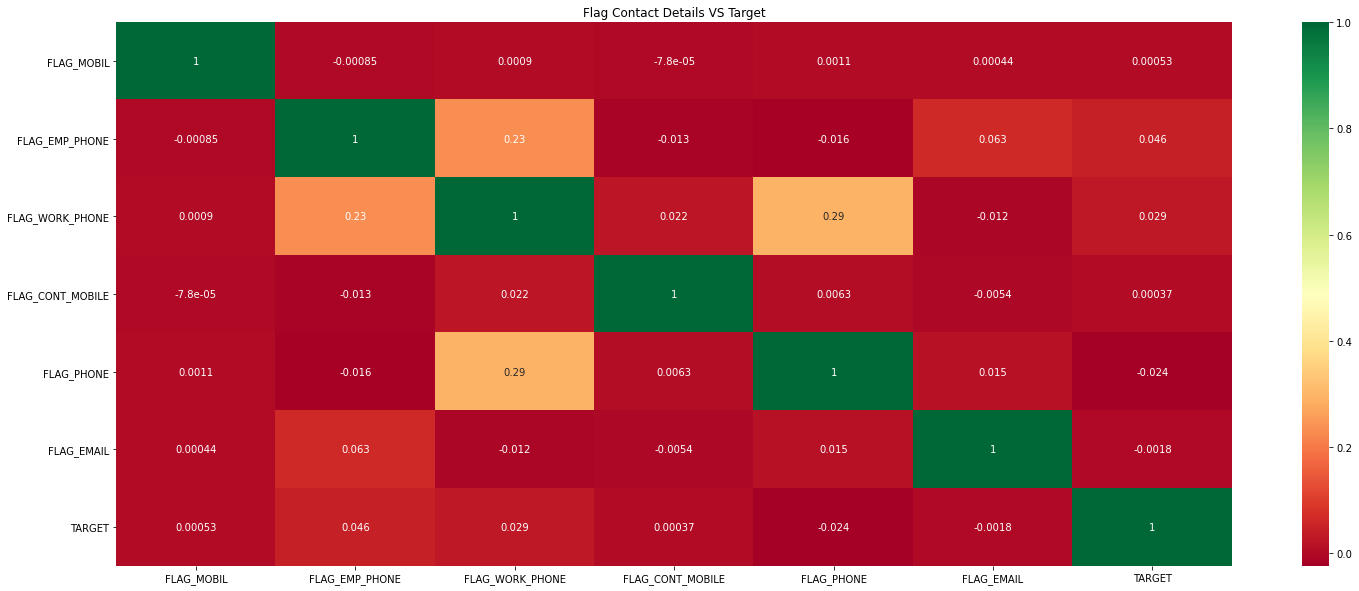

In [26]:
# Next we are going to analyse the Flag Contact details
adDF_Others = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','TARGET']

adDF_Others_Corr = adDF[adDF_Others].corr()
adDF_Others_fig = plt.figure(figsize=(25,10))
ax = sns.heatmap(adDF_Others_Corr,
            xticklabels=adDF_Others_Corr.columns,
            yticklabels=adDF_Others_Corr.columns,
            annot = True,
            cmap ="RdYlGn")
ax.set_title('Flag Contact Details VS Target')
plt.show()

#### Interpretation:
From the above Heatmap, we see there is no correlation between Target and Flag Contact details and hence can be removed

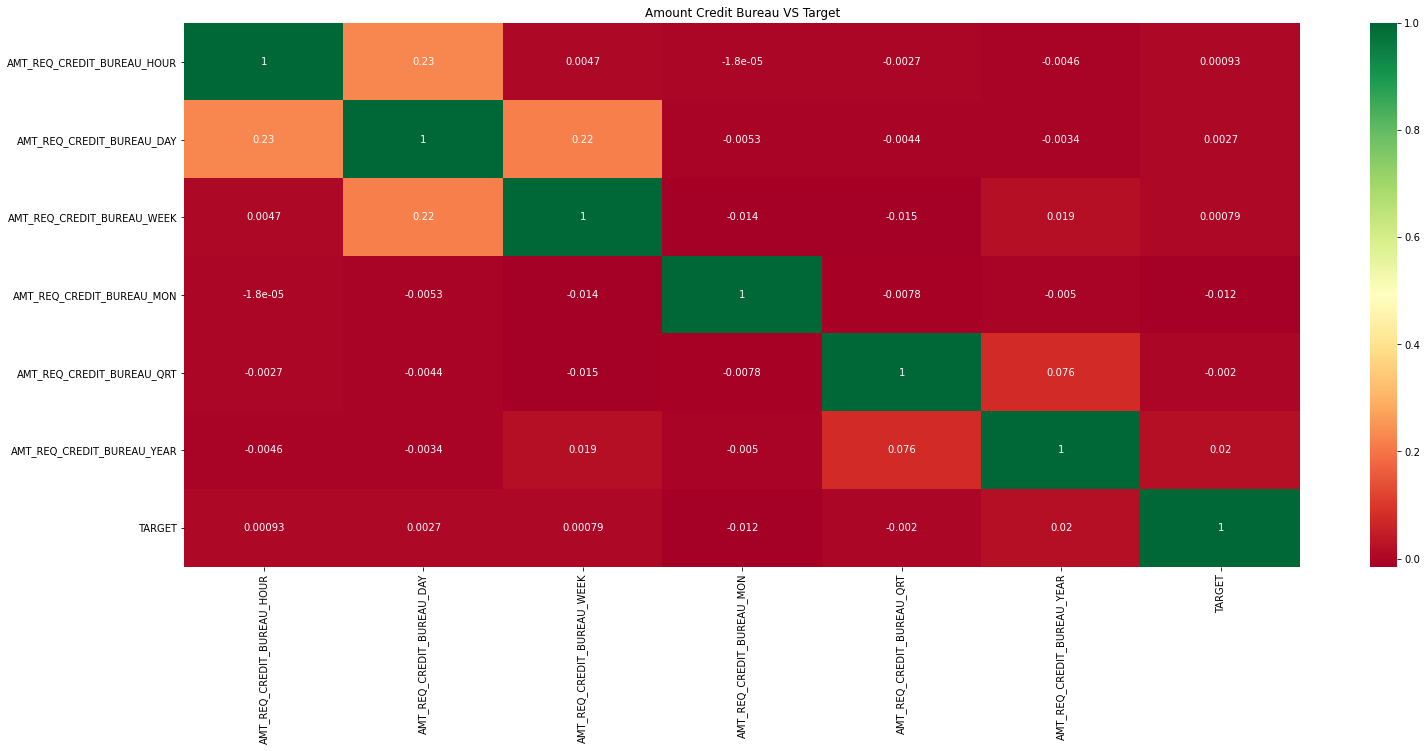

In [27]:
# Next we are going to analyse Amount Required Credit Bureau
adDF_amtReq = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','TARGET']

adDF_AmtReq_Corr = adDF[adDF_amtReq].corr()
adDF_AmtReq_fig = plt.figure(figsize=(25,10))
ax = sns.heatmap(adDF_AmtReq_Corr,
            xticklabels=adDF_AmtReq_Corr.columns,
            yticklabels=adDF_AmtReq_Corr.columns,
            annot = True,
            cmap ="RdYlGn")
ax.set_title('Amount Credit Bureau VS Target')
plt.show()

#### Interpretation:
From the above Heatmap, we see there is no correlation between Target and Amount Credit Bureau except for Amount Credit Bureau Hour,  Amount Credit Bureau Day and Amount Credit Bureau Week and hence other columns in Amount Credit Bureau can be removed

#### 4.1 Removing the unnecessary columns from Application Data dataset

In [28]:
#Removing unnecessary columns that we analysed using the heatmap along with the earlier analysed null% > 35
adDF_ColstoDelete = null35_adDF['Column_Name'].tolist() + ['EXT_SOURCE_2','EXT_SOURCE_3']
adDF_ColstoDelete = adDF_ColstoDelete + adDF_Flag
adDF_Others.remove('TARGET')
adDF_ColstoDelete = adDF_ColstoDelete + adDF_Others
adDF_amtReq.remove('AMT_REQ_CREDIT_BUREAU_HOUR')
adDF_amtReq.remove('AMT_REQ_CREDIT_BUREAU_DAY')
adDF_amtReq.remove('AMT_REQ_CREDIT_BUREAU_WEEK')
adDF_amtReq.remove('TARGET')
adDF_ColstoDelete = adDF_ColstoDelete + adDF_amtReq
print('Total unnecessary columns dropped from Application Data : ',len(adDF_ColstoDelete))

Total unnecessary columns dropped from Application Data :  80


In [29]:
#Dropping the unwanted columns
adDF.drop(labels=adDF_ColstoDelete,axis=1,inplace=True)

In [30]:
#Checking the Shape of the Application Data DataFrame
adDF.shape

(307511, 42)

#### 4.2 Removing the unnecessary columns from Previous Application Dataset

In [31]:
#Removing unnecessary columns in Previous Data DF
paDF_ColstoDelete = null35_paDF['Column_Name'].tolist()
paDF_ColstoDelete

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [32]:
paDF_ColstoDelete = paDF_ColstoDelete + ['FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [33]:
print('Total unnecessary columns dropped from Previous Application : ',len(paDF_ColstoDelete))

Total unnecessary columns dropped from Previous Application :  13


In [34]:
# Removing the unnecessary columns from previous application DF
paDF.drop(labels=paDF_ColstoDelete,axis=1,inplace=True)

In [35]:
#Checking the Shape of the Application Previous application DataFrame
paDF.shape

(1670214, 24)

#### Interpretation:
From our analysis we have sucessfully removed the columns:

Application Data     : 80

Previous Application : 13

---

### 5. Fixing Rows and Columns

#### 5.1 Application Data dataset

In [36]:
adDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

**AMT_ANNUITY is an important column for our analysis. Any null values may affect our analysis. Here it will be wrong to generalize the missing/null values for mean or median since Loan Annuity is a unique and important attribute of any loan. Since there are only 12 null values, we drop them.**

In [37]:
# Let's check the number of null values for AMT_ANNUITY column
adDF["AMT_ANNUITY"].isnull().sum()

12

In [38]:
# Dropping the 12 rows of AMT_ANNUITY column
adDF = adDF[~adDF["AMT_ANNUITY"].isnull()]

In [39]:
adDF.shape

(307499, 42)

**AMT_GOODS_PRICE represents the underlying security for the loans and is an important attribute. It will be inappropriate to replace the null values here by median or mean, since 2 loans with different amounts can have different values of goods as security. Hence we drop the null values.**

In [40]:
# Let's check the number of null values for AMT_GOODS_PRICE column
adDF["AMT_GOODS_PRICE"].isnull().sum()

278

In [41]:
# Dropping the 278 rows of AMT_GOODS_PRICE column
adDF = adDF[~adDF["AMT_GOODS_PRICE"].isnull()]

In [42]:
adDF.shape

(307221, 42)

**NAME_TYPE_SUITE contains 1014 null values. We feel, it is not of much importance as concerned with our analysis. So instead of dropping null rows we drop the whole column.**

In [43]:
# Let's check the number of null values for NAME_TYPE_SUITE column
adDF["NAME_TYPE_SUITE"].isnull().sum()

1014

In [44]:
# Drop NAME_TYPE_SUITE column
adDF.drop(adDF.columns[[11]], inplace = True, axis = 1)

In [45]:
adDF.shape

(307221, 41)

**OCCUPATION_TYPE column has more than 31% null values. It is inappropriate to replace these values with mode value which is 'Laborers'. It will not be proper to drop the column as we will lose other valuable categorical data of the column. Hence we replave the null values by "Unknown".**

In [46]:
#Let's check value counts for OCCUPATION_TYPE column
adDF["OCCUPATION_TYPE"].value_counts()

Laborers                 55132
Sales staff              32063
Core staff               27530
Managers                 21347
Drivers                  18589
High skill tech staff    11370
Accountants               9801
Medicine staff            8527
Security staff            6712
Cooking staff             5939
Cleaning staff            4648
Private service staff     2648
Low-skill Laborers        2092
Waiters/barmen staff      1346
Secretaries               1304
Realty agents              751
HR staff                   563
IT staff                   525
Name: OCCUPATION_TYPE, dtype: int64

In [47]:
# We see that the mode value is 'Laborers'
adDF["OCCUPATION_TYPE"].mode()

0    Laborers
dtype: object

In [48]:
# Replacing all the null values by 'Unknown'
adDF["OCCUPATION_TYPE"].replace(np.NaN, 'Unknown', inplace=True)

In [49]:
adDF["OCCUPATION_TYPE"].value_counts()

Unknown                  96334
Laborers                 55132
Sales staff              32063
Core staff               27530
Managers                 21347
Drivers                  18589
High skill tech staff    11370
Accountants               9801
Medicine staff            8527
Security staff            6712
Cooking staff             5939
Cleaning staff            4648
Private service staff     2648
Low-skill Laborers        2092
Waiters/barmen staff      1346
Secretaries               1304
Realty agents              751
HR staff                   563
IT staff                   525
Name: OCCUPATION_TYPE, dtype: int64

**OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are observable 30 or 60 days past due. They contain 1021 null values. These columns are only observations and not the actual count of people whose loans are 30 or 60 days past due. So we drop these columns. We replace null values from DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE columns with mode value.**

In [50]:
adDF["OBS_30_CNT_SOCIAL_CIRCLE"].isnull().sum()

1021

In [51]:
adDF["OBS_60_CNT_SOCIAL_CIRCLE"].isnull().sum()

1021

In [52]:
# Drop OBS_30_CNT_SOCIAL_CIRCLE column
adDF.drop(adDF.columns[[33]], inplace = True, axis = 1)

In [53]:
# Drop OBS_60_CNT_SOCIAL_CIRCLE column
adDF.drop(adDF.columns[[34]], inplace = True, axis = 1)

In [54]:
adDF.shape

(307221, 39)

In [55]:
adDF["DEF_30_CNT_SOCIAL_CIRCLE"].value_counts() # Seems to be categorical data

0.0     271065
1.0      28303
2.0       5318
3.0       1191
4.0        253
5.0         56
6.0         11
7.0          1
8.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [56]:
adDF["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts() # Seems to be categorical data

0.0     280454
1.0      21823
2.0       3166
3.0        597
4.0        135
5.0         20
6.0          3
24.0         1
7.0          1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [57]:
mode30 = adDF['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0]
mode30

0.0

In [58]:
mode60 = adDF['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0]
mode60

0.0

In [59]:
# Replacing all the null values by mode value
adDF["DEF_30_CNT_SOCIAL_CIRCLE"].replace(np.NaN, mode30, inplace=True)

In [60]:
# Replacing all the null values by mode value
adDF["DEF_60_CNT_SOCIAL_CIRCLE"].replace(np.NaN, mode60, inplace=True)

In [61]:
adDF["DEF_30_CNT_SOCIAL_CIRCLE"].isnull().sum()

0

In [62]:
adDF["DEF_60_CNT_SOCIAL_CIRCLE"].isnull().sum()

0

**The columns pertaining to number of enquiries to Credit Bureau about the client before application can be of importance to us since they may indicate whether a defaulter was seeking loan from different companies before approaching our company. So it is important to take care of the missing data. Here we can see that AMT_REQ_CREDIT_BUREAU_HOUR, DAY, WEEK have most values as 0. All these columns have approx 13% null values . Analysis of these columns infer that this can be categorical data so we can safely impute the null values by the mode value which is 0.**

In [63]:
adDF["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts()

0.0    264124
1.0      1559
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [64]:
adDF["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts()

0.0    264260
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [65]:
adDF["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts()

0.0    257220
1.0      8201
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [66]:
#Numerical values analysis - AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK
print('AMT_REQ_CREDIT_BUREAU_HOUR mean, median and mode values : %.2f, %.2f and %.2f'%(adDF['AMT_REQ_CREDIT_BUREAU_HOUR'].mean(),adDF['AMT_REQ_CREDIT_BUREAU_HOUR'].median(),adDF['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()) )
print('AMT_REQ_CREDIT_BUREAU_DAY mean, median and mode values : %.2f, %.2f and %.2f'%(adDF['AMT_REQ_CREDIT_BUREAU_DAY'].mean(),adDF['AMT_REQ_CREDIT_BUREAU_DAY'].median(),adDF['AMT_REQ_CREDIT_BUREAU_DAY'].mode()) )
print('AMT_REQ_CREDIT_BUREAU_WEEK mean, median and mode values : %.2f, %.2f and %.2f'%(adDF['AMT_REQ_CREDIT_BUREAU_WEEK'].mean(),adDF['AMT_REQ_CREDIT_BUREAU_WEEK'].median(),adDF['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()) )

AMT_REQ_CREDIT_BUREAU_HOUR mean, median and mode values : 0.01, 0.00 and 0.00
AMT_REQ_CREDIT_BUREAU_DAY mean, median and mode values : 0.01, 0.00 and 0.00
AMT_REQ_CREDIT_BUREAU_WEEK mean, median and mode values : 0.03, 0.00 and 0.00


In [67]:
#From the above analysis we can replace the missing values with median values
amount_adDF = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK']

for amt in amount_adDF:
    adDF[amt].fillna(adDF[amt].median(),inplace = True)

In [68]:
adDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307221 non-null  int64  
 1   TARGET                       307221 non-null  int64  
 2   NAME_CONTRACT_TYPE           307221 non-null  object 
 3   CODE_GENDER                  307221 non-null  object 
 4   FLAG_OWN_CAR                 307221 non-null  object 
 5   FLAG_OWN_REALTY              307221 non-null  object 
 6   CNT_CHILDREN                 307221 non-null  int64  
 7   AMT_INCOME_TOTAL             307221 non-null  float64
 8   AMT_CREDIT                   307221 non-null  float64
 9   AMT_ANNUITY                  307221 non-null  float64
 10  AMT_GOODS_PRICE              307221 non-null  float64
 11  NAME_INCOME_TYPE             307221 non-null  object 
 12  NAME_EDUCATION_TYPE          307221 non-null  object 
 13 

#### 5.2 Previous Data DF

#### Numerical values analysis - AMT_ANNUITY,AMT_GOODS_PRICE,CNT_PAYMENT. The null values in all these columns are more than 20%. But we cannot delete these columns nor can we drop the rows. So we take median imputation approach.

In [69]:
paDF['CNT_PAYMENT'].value_counts().mode()

0    2
1    3
dtype: int64

In [70]:
paDF.shape

(1670214, 24)

In [71]:
paDF['CNT_PAYMENT'].isnull().sum()

372230

In [72]:
paDF['CNT_PAYMENT'].median()

12.0

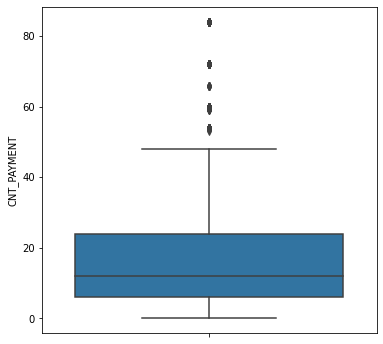

In [73]:
plt.figure(figsize=(6,6))
sns.boxplot(y=paDF['CNT_PAYMENT'])
plt.show()

In [74]:
#Replacing Laborers for null in CNT_PAYMENT
paDF['CNT_PAYMENT'].fillna(paDF['CNT_PAYMENT'].median(),inplace = True)

In [75]:
print('Mean : ',paDF['AMT_ANNUITY'].value_counts().mean())
print('Median : ',paDF['AMT_ANNUITY'].value_counts().median())
print('Mode : ',paDF['AMT_ANNUITY'].value_counts().mode())

Mean :  3.6260549392528194
Median :  2.0
Mode :  0    1
dtype: int64


In [76]:
paDF['AMT_ANNUITY'].value_counts().mean()

3.6260549392528194

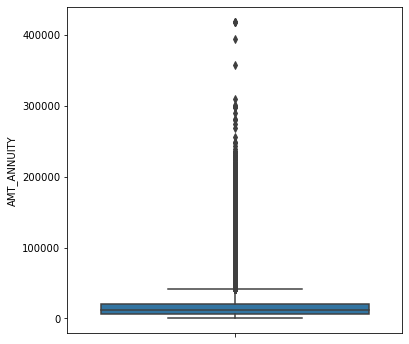

In [77]:
plt.figure(figsize=(6,6))
sns.boxplot(y=paDF['AMT_ANNUITY'])
plt.show()

In [78]:
#Replacing Laborers for null in AMT_ANNUITY
paDF['AMT_ANNUITY'].fillna(paDF['AMT_ANNUITY'].median(),inplace = True)

#### Interpretation:
From the above boxplot, we see that the outlier's are high and hence we are filling NA's with the median 

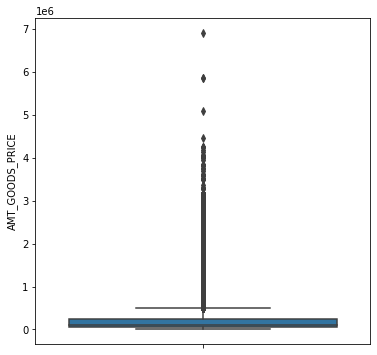

In [79]:
plt.figure(figsize=(6,6))
sns.boxplot(y=paDF['AMT_GOODS_PRICE'])
plt.show()

In [80]:
paDF['AMT_GOODS_PRICE'].value_counts()

45000.000     47831
225000.000    43549
135000.000    40666
450000.000    38926
90000.000     29367
              ...  
355626.000        1
247404.465        1
355594.500        1
355590.000        1
442350.000        1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

In [81]:
paDF['AMT_GOODS_PRICE'].fillna(paDF['AMT_GOODS_PRICE'].mode()[0],inplace = True)

#### Interpretation:
Since the mode value is higher based on the value counts we are filling the null values with the Mode

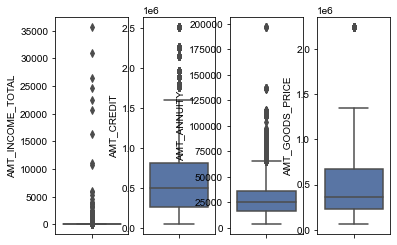

In [82]:
f, axes = plt.subplots(1, 4)
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(y=adDF['AMT_INCOME_TOTAL'].value_counts(), data=adDF,  orient='v' , ax=axes[0])
sns.boxplot(y=adDF['AMT_CREDIT'], data=adDF['AMT_CREDIT'],  orient='v' , ax=axes[1])
sns.boxplot(y=adDF['AMT_ANNUITY'], data=adDF['AMT_ANNUITY'],  orient='v' , ax=axes[2])
sns.boxplot(y=adDF['AMT_GOODS_PRICE'], data=adDF['AMT_GOODS_PRICE'],  orient='v' , ax=axes[3])
plt.show()

---

### 6. Identifying Outliers

#### 6.1 Application Data

**CNT_CHILDREN**

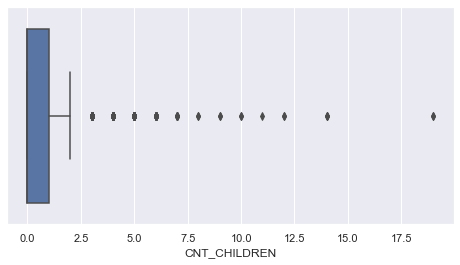

In [83]:
plt.figure(figsize= ( 8,4))
sns.boxplot(adDF["CNT_CHILDREN"])
plt.show()

**CNT_CHILDREN column shows max value 19. This is an outlier since considering the attribute, in a generic scenario it is not possible.**

**AMT_INCOME_TOTAL.**

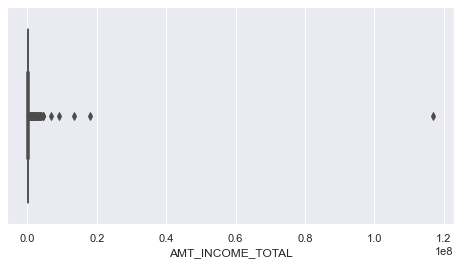

In [84]:
plt.figure(figsize= (8,4))
sns.boxplot(adDF["AMT_INCOME_TOTAL"])
plt.show()

**AMT_INCOME_TOTAL column shows max value 1.170000e+08. This can be treated as an outlier since it is way greater than the median and 75th percentile value. Also such cases of clients having such a high income value approaching for loan, is not common.**

**AMT_ANNUITY**

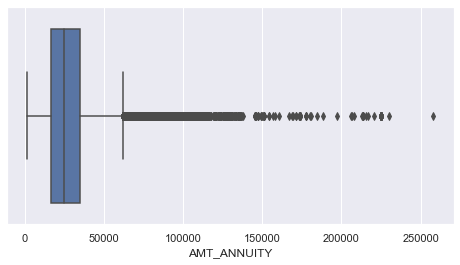

In [85]:
plt.figure(figsize= (8,4))
sns.boxplot(adDF["AMT_ANNUITY"])
plt.show()

**AMT_ANNUITY column shows max value 258025.50. This can be considered as an outlier since it indicates a loan installment very high as compared to other values in the column.**

**DAYS_EMPLOYED**

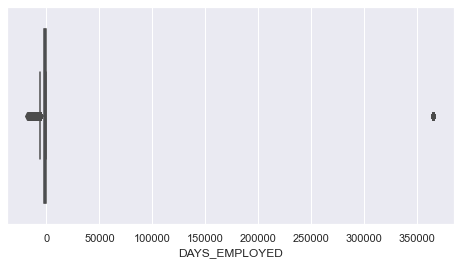

In [86]:
plt.figure(figsize= (8,4))
sns.boxplot(adDF["DAYS_EMPLOYED"])
plt.show()

**DAYS_EMPLOYED shows max value as 365243.0. This is an outlier since it is not possible to have period of employment 365243.0 days or 1000 years.**

**DEF_30_CNT_SOCIAL_CIRCLE**

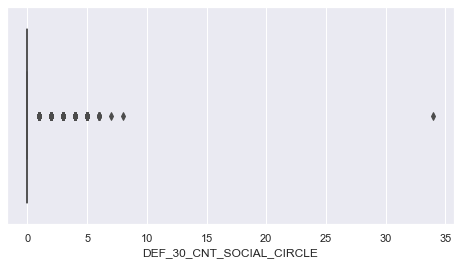

In [87]:
plt.figure(figsize= (8,4))
sns.boxplot(adDF["DEF_30_CNT_SOCIAL_CIRCLE"])
plt.show()

**DEF_30_CNT_SOCIAL_CIRCLE column. Only one observation shows value of 34. Considering the nature of this attribute, we cannot necessarily treat this as an outlier.**

**AMT_CREDIT**

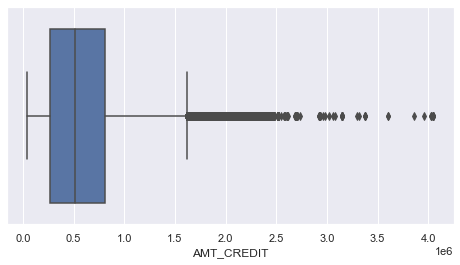

In [88]:
plt.figure(figsize= (8,4))
sns.boxplot(adDF["AMT_CREDIT"])
plt.show()

**AMT_CREDIT shows some outliers but we cannot surely say that they are outliers since loan amounts can be high.**

**AMT_GOODS_PRICE**

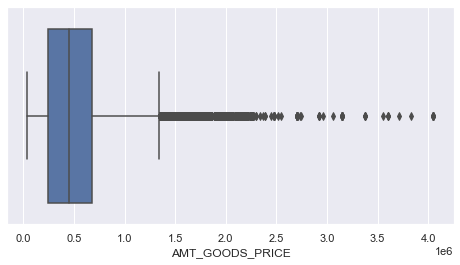

In [89]:
plt.figure(figsize= (8,4))
sns.boxplot(adDF["AMT_GOODS_PRICE"])
plt.show()

**AMT_GOODS_PRICE shows some outliers but we cannot surely say that these are outliers since goods(security prices) can be high. We can also see that the loan amounts assciated with these securities are also high.**

---

### 7. Standardising Values

**The CODE_GENDER column shows 4 values as XNA. We can convert these values to 'F' since 'F' is the mode value for this column and in this way we will not lose the other data pertaining to these 4 rows.**

In [90]:
# Let's check the mode value for CODE_GENDER column
gender_mode = adDF["CODE_GENDER"].mode()[0]
gender_mode

'F'

In [91]:
adDF["CODE_GENDER"].replace('XNA', gender_mode, inplace=True)

In [92]:
adDF["CODE_GENDER"].value_counts()

F    202255
M    104966
Name: CODE_GENDER, dtype: int64

**DAYS_BIRTH and DAYS_EMPLOYED column - values converted to years.**

In [93]:
adDF["DAYS_BIRTH"] = np.round(abs(adDF["DAYS_BIRTH"]/365)).astype(int)

In [94]:
adDF["DAYS_BIRTH"][:5]  # checking if the conversion is proper

0    26
1    46
2    52
3    52
4    55
Name: DAYS_BIRTH, dtype: int32

In [95]:
adDF["DAYS_EMPLOYED"] = np.round(abs(adDF["DAYS_EMPLOYED"]/365)).astype(int)

In [96]:
adDF["DAYS_EMPLOYED"][:5]  # checking if the conversion is proper

0    2
1    3
2    1
3    8
4    8
Name: DAYS_EMPLOYED, dtype: int32

---

### 8. Check for imbalance in the data

In [97]:
adDF["TARGET"].value_counts()  #  We can see that the number of "0" are way too more than "1"

0    282417
1     24804
Name: TARGET, dtype: int64

In [98]:
adDF["TARGET"].value_counts(normalize = True)

0    0.919263
1    0.080737
Name: TARGET, dtype: float64

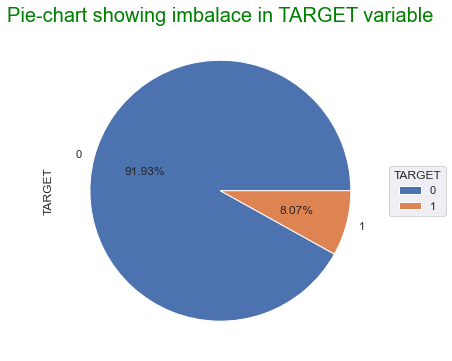

In [99]:
plt.figure(figsize= (10,6))
fig = adDF["TARGET"].value_counts(normalize = True).plot.pie(autopct='%1.2f%%')
plt.title("Pie-chart showing imbalace in TARGET variable", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
fig.legend(title="TARGET",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### 9. Univariate Analysis : We perform this analysis on application_data dataset.

#### 9.1 Categorical Unordered Univariate Analysis.

**CODE_GENDER column.**<br>
**The attribute CODE_GENDER also shows imbalance. 65.81% customers are females while 34.19% customers are males. The ratio of number of males/females comes out to be 0.52**

In [100]:
adDF["CODE_GENDER"].value_counts()

F    202255
M    104966
Name: CODE_GENDER, dtype: int64

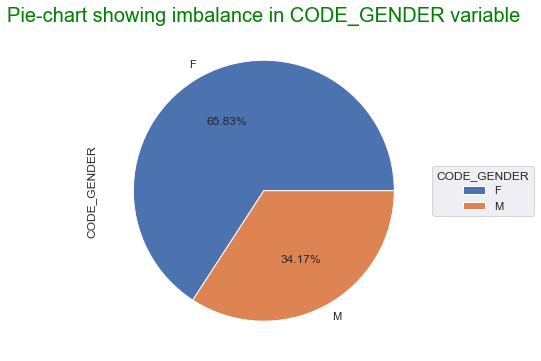

In [101]:
plt.figure(figsize= (10,6))
fig = adDF["CODE_GENDER"].value_counts(normalize = True).plot.pie(autopct='%1.2f%%')
plt.title("Pie-chart showing imbalance in CODE_GENDER variable", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
fig.legend(title="CODE_GENDER",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

**NAME_CONTRACT_TYPE column. We can see than 90.6% loans are cash loans(or can be called as term loans) while only 9.4% are revolving loans(or can be called as overdraft loans)**

In [102]:
adDF["NAME_CONTRACT_TYPE"].value_counts(normalize = True)

Cash loans         0.905602
Revolving loans    0.094398
Name: NAME_CONTRACT_TYPE, dtype: float64

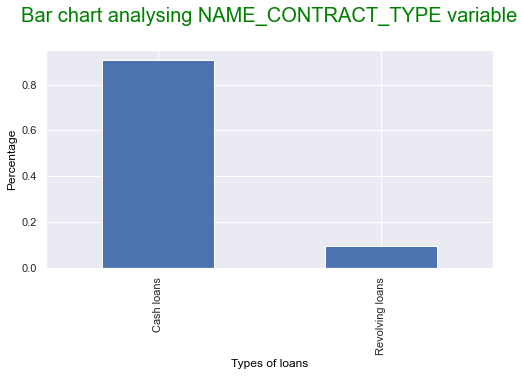

In [103]:
plt.figure(figsize= (8,4))
adDF["NAME_CONTRACT_TYPE"].value_counts(normalize = True).plot.bar()
plt.title("Bar chart analysing NAME_CONTRACT_TYPE variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Types of loans", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

**NAME_INCOME_TYPE column. 51.6% customers are in 'Working' category. This may mean that 51.6% of customers are in service in private/public sector companies**

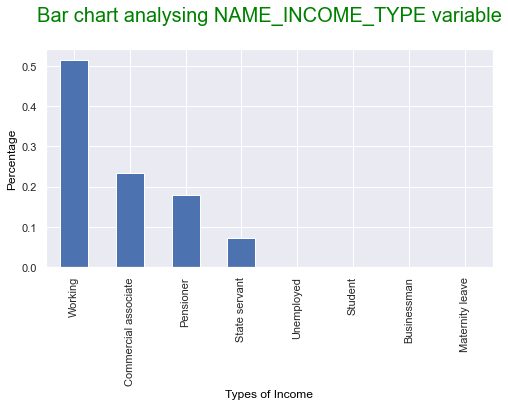

In [104]:
plt.figure(figsize= (8,4))
adDF["NAME_INCOME_TYPE"].value_counts(normalize = True).plot.bar()
plt.title("Bar chart analysing NAME_INCOME_TYPE variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Types of Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

**NAME_FAMILY_STATUS column. Most of the customers are married - 63%**

In [105]:
adDF["NAME_FAMILY_STATUS"].value_counts(normalize = True)

Married                 0.638817
Single / not married    0.147721
Civil marriage          0.096833
Separated               0.064309
Widow                   0.052321
Name: NAME_FAMILY_STATUS, dtype: float64

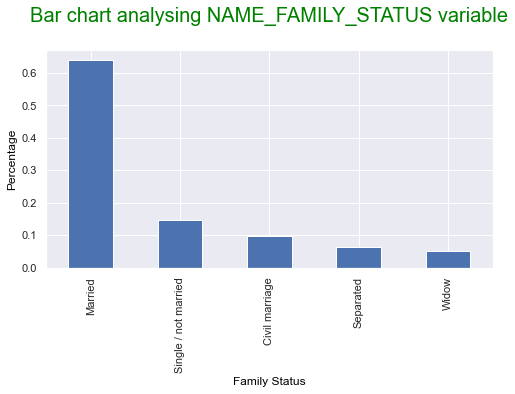

In [106]:
plt.figure(figsize= (8,4))
adDF["NAME_FAMILY_STATUS"].value_counts(normalize = True).plot.bar()
plt.title("Bar chart analysing NAME_FAMILY_STATUS variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Family Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

**NAME_HOUSING_TYPE column. Most of the customers live in apartments - 88.7%**

In [107]:
adDF["NAME_HOUSING_TYPE"].value_counts(normalize = True)

House / apartment      0.887387
With parents           0.048245
Municipal apartment    0.036342
Rented apartment       0.015868
Office apartment       0.008512
Co-op apartment        0.003646
Name: NAME_HOUSING_TYPE, dtype: float64

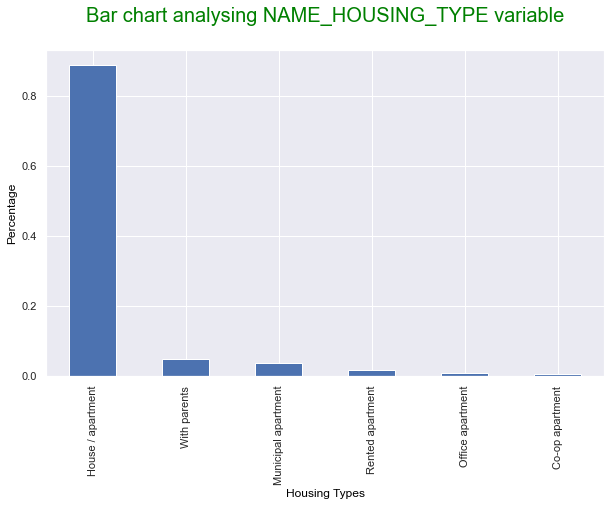

In [108]:
plt.figure(figsize= [10,6])
adDF["NAME_HOUSING_TYPE"].value_counts(normalize = True).plot.bar()
plt.title("Bar chart analysing NAME_HOUSING_TYPE variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Housing Types", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

**OCCUPATION_TYPE column. We replace the null values with unkown which is 31.3% od the data. Second largest is 17.9% that is Laborers with least being IT Staff**

In [109]:
adDF["OCCUPATION_TYPE"].value_counts(normalize = True)

Unknown                  0.313566
Laborers                 0.179454
Sales staff              0.104365
Core staff               0.089610
Managers                 0.069484
Drivers                  0.060507
High skill tech staff    0.037009
Accountants              0.031902
Medicine staff           0.027755
Security staff           0.021847
Cooking staff            0.019331
Cleaning staff           0.015129
Private service staff    0.008619
Low-skill Laborers       0.006809
Waiters/barmen staff     0.004381
Secretaries              0.004245
Realty agents            0.002444
HR staff                 0.001833
IT staff                 0.001709
Name: OCCUPATION_TYPE, dtype: float64

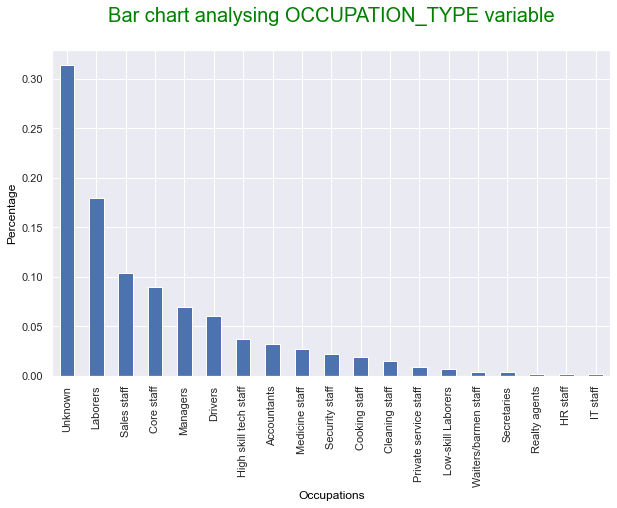

In [110]:
plt.figure(figsize= [10,6])
adDF["OCCUPATION_TYPE"].value_counts(normalize = True).plot.bar()
plt.title("Bar chart analysing OCCUPATION_TYPE variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Occupations", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

#### 9.2. Categorical Ordered Univariate Analysis.

**NAME_EDUCATION_TYPE column. We can see that 71% customers have secondary education. Only 24% of customers have higher education**


In [111]:
adDF["NAME_EDUCATION_TYPE"].value_counts(normalize = True)

Secondary / secondary special    0.710192
Higher education                 0.243450
Incomplete higher                0.033416
Lower secondary                  0.012408
Academic degree                  0.000534
Name: NAME_EDUCATION_TYPE, dtype: float64

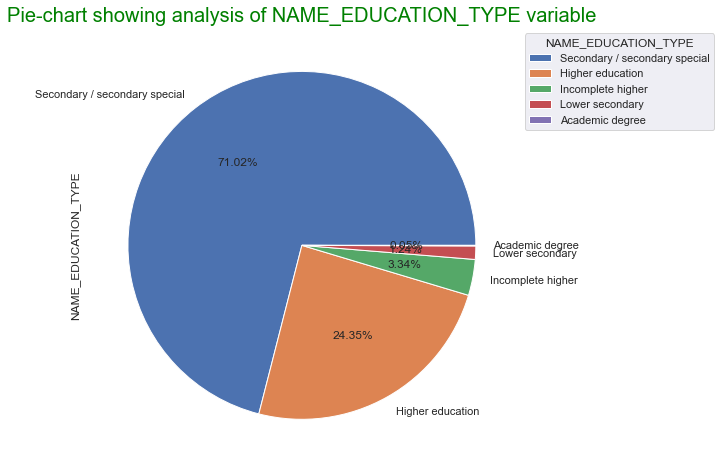

In [112]:
plt.figure(figsize= [10,8])
fig = adDF["NAME_EDUCATION_TYPE"].value_counts(normalize = True).plot.pie(autopct='%1.2f%%')
plt.title("Pie-chart showing analysis of NAME_EDUCATION_TYPE variable", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
fig.legend(title="NAME_EDUCATION_TYPE",
          loc= "upper left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

**WEEKDAY_APPR_PROCESS_START column. Loan Appraisal process starts mostly on Tuesday**

In [113]:
adDF["WEEKDAY_APPR_PROCESS_START"].value_counts(normalize = True)

TUESDAY      0.175304
WEDNESDAY    0.168904
MONDAY       0.164969
THURSDAY     0.164507
FRIDAY       0.163670
SATURDAY     0.110041
SUNDAY       0.052604
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

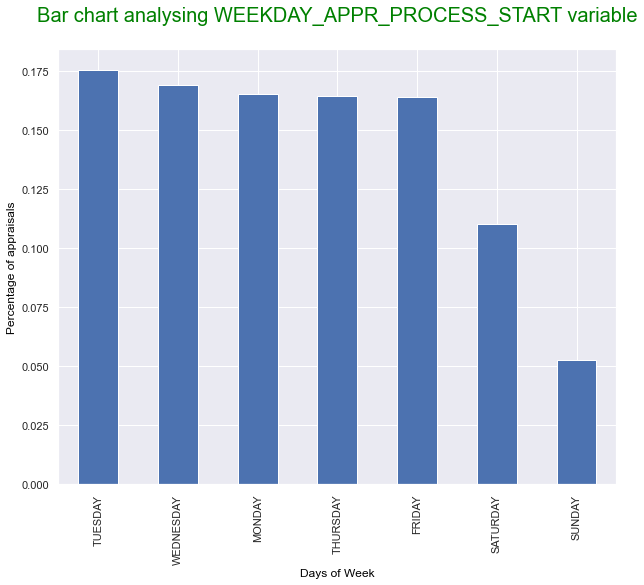

In [114]:
plt.figure(figsize= [10,8])
adDF["WEEKDAY_APPR_PROCESS_START"].value_counts(normalize = True).plot.bar()
plt.title("Bar chart analysing WEEKDAY_APPR_PROCESS_START variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Days of Week", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage of appraisals", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

**Bucketing of the DAYS_BIRTH and DAYS_EMPLOYED columns. 2 columns added AGE_GROUP, EMPLOYED_PERIOD**

In [115]:
adDF["AGE_GROUP"] = pd.cut(adDF["DAYS_BIRTH"], bins=[0,30,40,50,60,9999], labels = ["<30","30-40","40-50","50-60","60+"])

In [116]:
adDF[["DAYS_BIRTH","AGE_GROUP"]][:5] # Check if buckets are formed properly

DAYS_BIRTH AGE_GROUP
0          26       <30
1          46     40-50
2          52     50-60
3          52     50-60
4          55     50-60

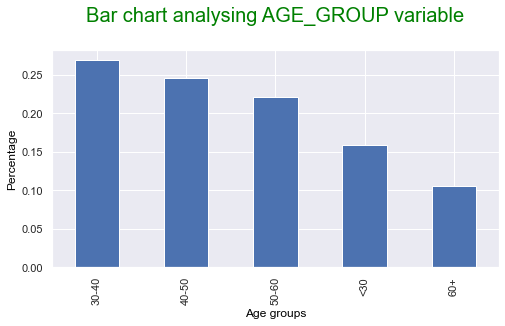

In [117]:
plt.figure(figsize= [8,4])
adDF["AGE_GROUP"].value_counts(normalize = True).plot.bar()
plt.title("Bar chart analysing AGE_GROUP variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Age groups", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

**Inference : Most customers are in age group 30-40 years**

In [118]:
adDF["EMPLOYED_PERIOD"] = pd.cut(adDF["DAYS_EMPLOYED"], bins=[0,5,10,15,20,25,30,35,9999], labels = ["<5","5-10","10-15","15-20","20-25","25-30","30-35","35+"])

In [119]:
adDF[["DAYS_EMPLOYED","EMPLOYED_PERIOD"]][:5] # Check if buckets are formed properly

DAYS_EMPLOYED EMPLOYED_PERIOD
0              2              <5
1              3              <5
2              1              <5
3              8            5-10
4              8            5-10

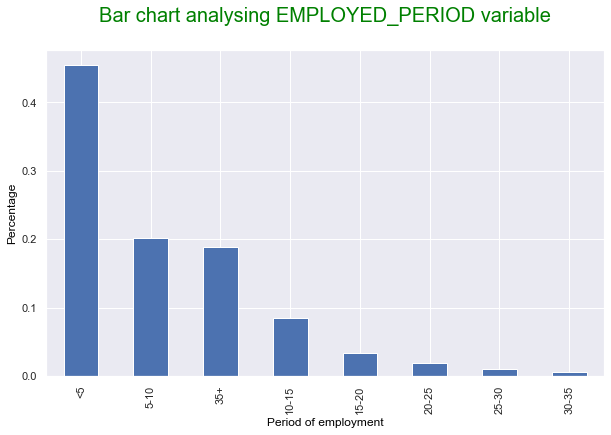

In [120]:
plt.figure(figsize= [10,6])
adDF["EMPLOYED_PERIOD"].value_counts(normalize=True).plot.bar()
plt.title("Bar chart analysing EMPLOYED_PERIOD variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Period of employment", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

**Inference : Most customers are newly employed with employment period less than 5 years**

**REGION_RATING_CLIENT column**

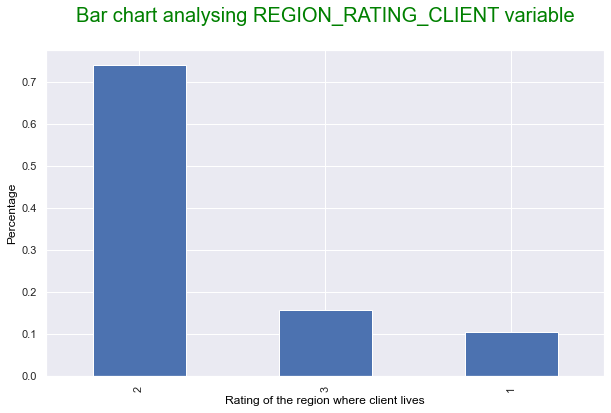

In [121]:
plt.figure(figsize= [10,6])
adDF["REGION_RATING_CLIENT"].value_counts(normalize=True).plot.bar()
plt.title("Bar chart analysing REGION_RATING_CLIENT variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Rating of the region where client lives", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

**Inference : Most customers live in regions rated 2**

---

### 10. Segmented Univariate Analysis : We perform this analysis on application_data dataset.

In [122]:
#Dividing the adDF dataframe into 2 segments with respect to the TARGET variable - '0-Repayer' & '1-Defaulter'
defaulter_adDF = adDF[adDF['TARGET']==1]
repayer_adDF = adDF[adDF['TARGET']==0]

#### 10.1 Categorical Unordered Univariate Analysis.

**NAME_CONTRACT_TYPE variable**

In [123]:
defaulter_adDF["NAME_CONTRACT_TYPE"].value_counts(normalize = True)

Cash loans         0.93618
Revolving loans    0.06382
Name: NAME_CONTRACT_TYPE, dtype: float64

In [124]:
repayer_adDF["NAME_CONTRACT_TYPE"].value_counts(normalize = True)

Cash loans         0.902917
Revolving loans    0.097083
Name: NAME_CONTRACT_TYPE, dtype: float64

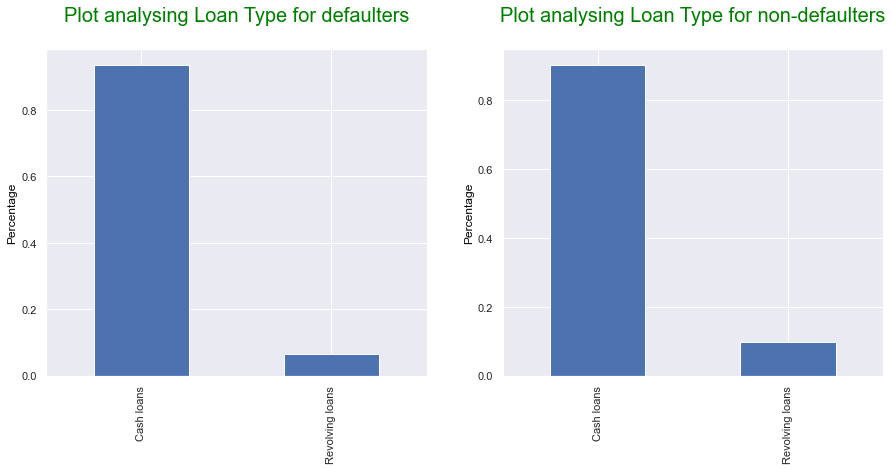

In [125]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
defaulter_adDF["NAME_CONTRACT_TYPE"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Loan Type for defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.subplot(1,2,2)
repayer_adDF["NAME_CONTRACT_TYPE"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Loan Type for non-defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inferences :**<br>
**1. 93.6% of loans for customers with payment difficulties are cash loans and 6.4% are revolving loans.**<br>
**2. Non-defaulters have 90.3% cash loans and 9.7% revolving loans.**


**CODE_GENDER variable**

In [126]:
defaulter_adDF["CODE_GENDER"].value_counts(normalize = True)

F    0.570553
M    0.429447
Name: CODE_GENDER, dtype: float64

In [127]:
repayer_adDF["CODE_GENDER"].value_counts(normalize = True)

F    0.666047
M    0.333953
Name: CODE_GENDER, dtype: float64

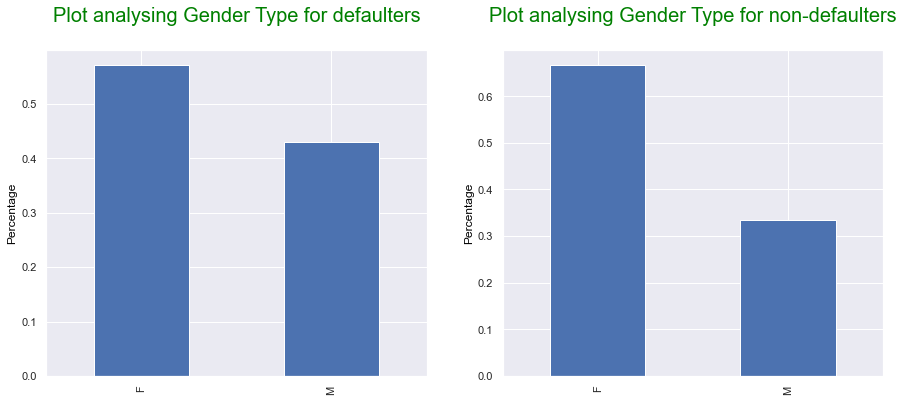

In [128]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
defaulter_adDF["CODE_GENDER"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Gender Type for defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.subplot(1,2,2)
repayer_adDF["CODE_GENDER"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Gender Type for non-defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inferences:**<br>
**1. Females are more in number in both defaulters and non-defaulters**<br>
**2. Number of males is more in case of defaulters than in non-defaulters.**

**NAME_FAMILY_STATUS variable**

In [129]:
defaulter_adDF["NAME_FAMILY_STATUS"].value_counts(normalize = True)

Married                 0.598129
Single / not married    0.179487
Civil marriage          0.119295
Separated               0.065312
Widow                   0.037776
Name: NAME_FAMILY_STATUS, dtype: float64

In [130]:
repayer_adDF["NAME_FAMILY_STATUS"].value_counts(normalize = True)

Married                 0.642391
Single / not married    0.144931
Civil marriage          0.094860
Separated               0.064221
Widow                   0.053598
Name: NAME_FAMILY_STATUS, dtype: float64

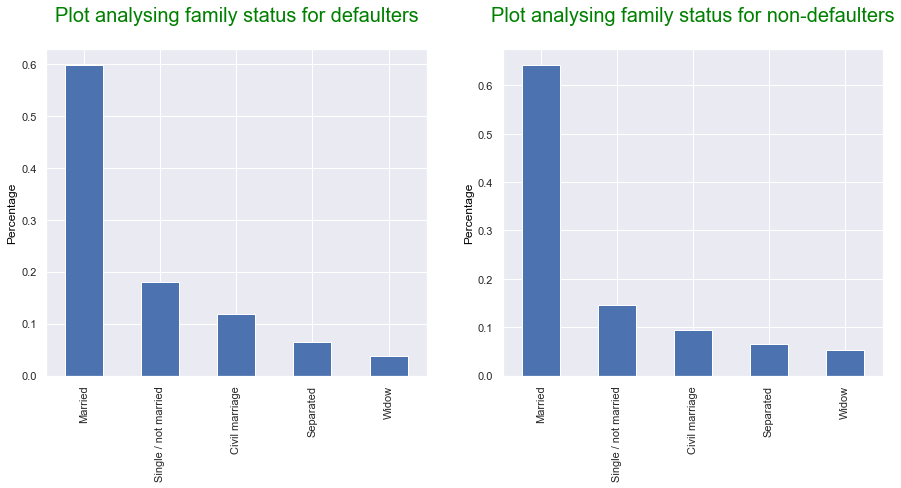

In [131]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
defaulter_adDF["NAME_FAMILY_STATUS"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing family status for defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.subplot(1,2,2)
repayer_adDF["NAME_FAMILY_STATUS"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing family status for non-defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference - Percentage of Single/not married and customers who had had Civil marriage is more among defaulters than non-defaulters**

**NAME_HOUSING_TYPE variable**

In [132]:
defaulter_adDF["NAME_HOUSING_TYPE"].value_counts(normalize = True)

House / apartment      0.856918
With parents           0.069948
Municipal apartment    0.038462
Rented apartment       0.024190
Office apartment       0.006894
Co-op apartment        0.003588
Name: NAME_HOUSING_TYPE, dtype: float64

In [133]:
repayer_adDF["NAME_HOUSING_TYPE"].value_counts(normalize = True)

House / apartment      0.890063
With parents           0.046339
Municipal apartment    0.036156
Rented apartment       0.015137
Office apartment       0.008654
Co-op apartment        0.003651
Name: NAME_HOUSING_TYPE, dtype: float64

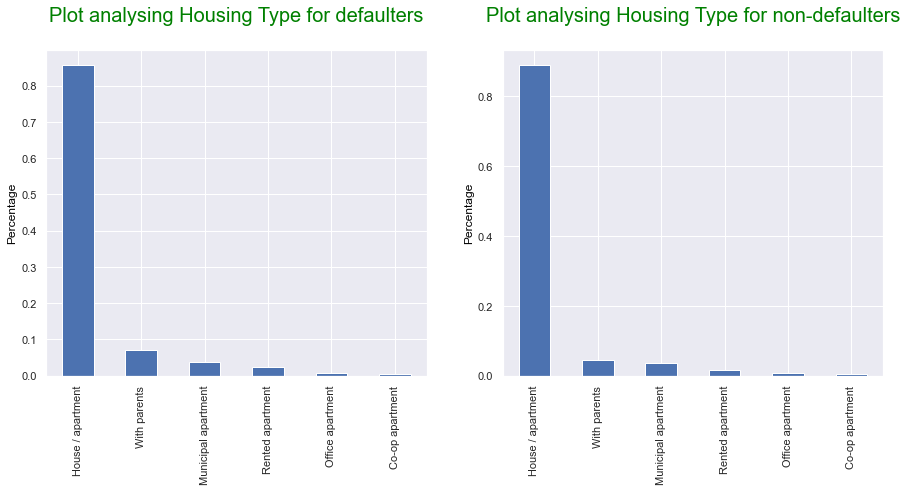

In [134]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
defaulter_adDF["NAME_HOUSING_TYPE"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Housing Type for defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.subplot(1,2,2)
repayer_adDF["NAME_HOUSING_TYPE"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Housing Type for non-defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inferences:**<br>
**In case of defaulters, there are more number of people staying in rented apartments as compared to non-defualters.**

**NAME_INCOME_TYPE variable**

In [135]:
defaulter_adDF["NAME_INCOME_TYPE"].value_counts(normalize = True)

Working                 0.613208
Commercial associate    0.215973
Pensioner               0.120142
State servant           0.050274
Unemployed              0.000323
Maternity leave         0.000081
Name: NAME_INCOME_TYPE, dtype: float64

In [136]:
repayer_adDF["NAME_INCOME_TYPE"].value_counts(normalize = True)

Working                 0.507664
Commercial associate    0.234441
Pensioner               0.185396
State servant           0.072340
Student                 0.000064
Unemployed              0.000050
Businessman             0.000035
Maternity leave         0.000011
Name: NAME_INCOME_TYPE, dtype: float64

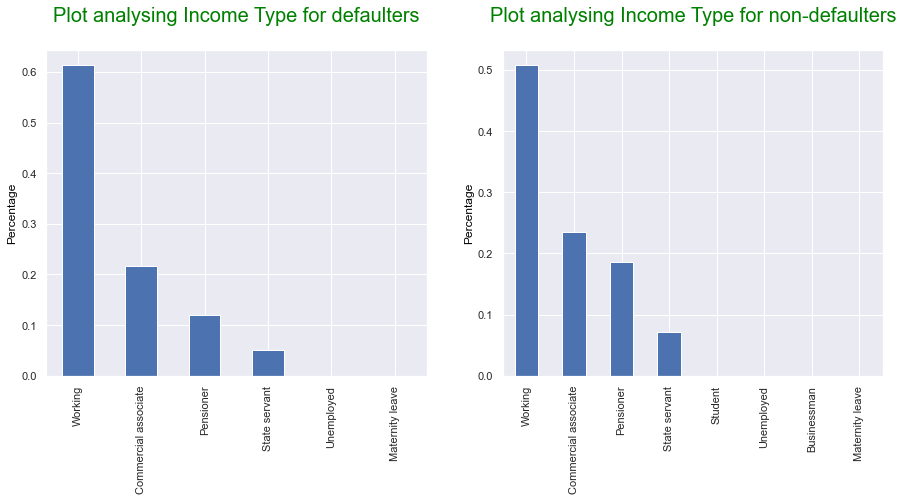

In [137]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
defaulter_adDF["NAME_INCOME_TYPE"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Income Type for defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.subplot(1,2,2)
repayer_adDF["NAME_INCOME_TYPE"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Income Type for non-defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**OCCUPATION_TYPE variable**

In [138]:
defaulter_adDF["OCCUPATION_TYPE"].value_counts(normalize = True)

Unknown                  0.252943
Laborers                 0.235123
Sales staff              0.124536
Drivers                  0.084946
Core staff               0.069948
Managers                 0.053459
Security staff           0.029068
High skill tech staff    0.028262
Cooking staff            0.025036
Medicine staff           0.023020
Accountants              0.019110
Cleaning staff           0.018021
Low-skill Laborers       0.014473
Private service staff    0.007015
Waiters/barmen staff     0.006128
Secretaries              0.003709
Realty agents            0.002379
HR staff                 0.001451
IT staff                 0.001371
Name: OCCUPATION_TYPE, dtype: float64

In [139]:
defaulter_adDF["OCCUPATION_TYPE"].value_counts(normalize = True)

Unknown                  0.252943
Laborers                 0.235123
Sales staff              0.124536
Drivers                  0.084946
Core staff               0.069948
Managers                 0.053459
Security staff           0.029068
High skill tech staff    0.028262
Cooking staff            0.025036
Medicine staff           0.023020
Accountants              0.019110
Cleaning staff           0.018021
Low-skill Laborers       0.014473
Private service staff    0.007015
Waiters/barmen staff     0.006128
Secretaries              0.003709
Realty agents            0.002379
HR staff                 0.001451
IT staff                 0.001371
Name: OCCUPATION_TYPE, dtype: float64

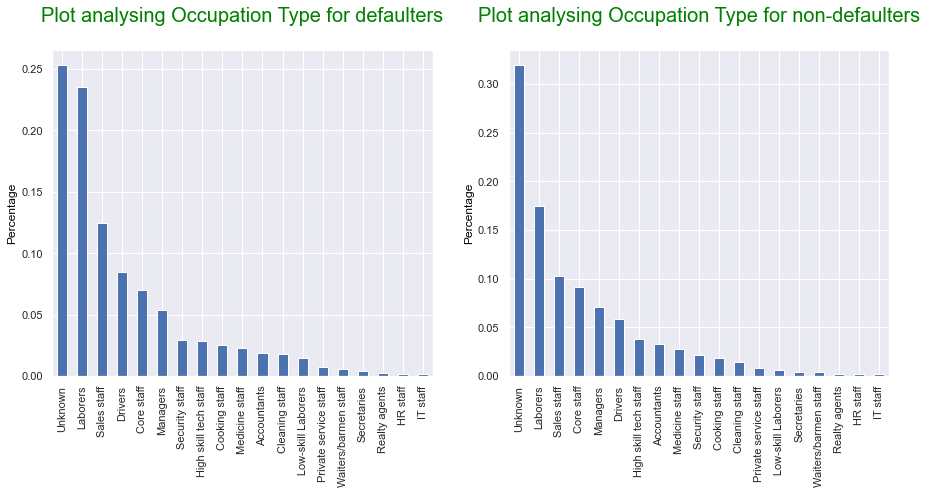

In [140]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
defaulter_adDF["OCCUPATION_TYPE"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Occupation Type for defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.subplot(1,2,2)
repayer_adDF["OCCUPATION_TYPE"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Occupation Type for non-defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inferences:**<br>
**1. Percentage of laborer defaulters in more as compared to non-defaulters.**<br>
**2. Low-skilled laborers defaulters are more than repayers.**

#### 10.2. Categorical Ordered Univariate Analysis.

**NAME_EDUCATION_TYPE variable**

In [141]:
defaulter_adDF["NAME_EDUCATION_TYPE"].value_counts(normalize = True)

Secondary / secondary special    0.786446
Higher education                 0.161506
Incomplete higher                0.035115
Lower secondary                  0.016812
Academic degree                  0.000121
Name: NAME_EDUCATION_TYPE, dtype: float64

In [142]:
repayer_adDF["NAME_EDUCATION_TYPE"].value_counts(normalize = True)

Secondary / secondary special    0.703495
Higher education                 0.250647
Incomplete higher                0.033266
Lower secondary                  0.012021
Academic degree                  0.000570
Name: NAME_EDUCATION_TYPE, dtype: float64

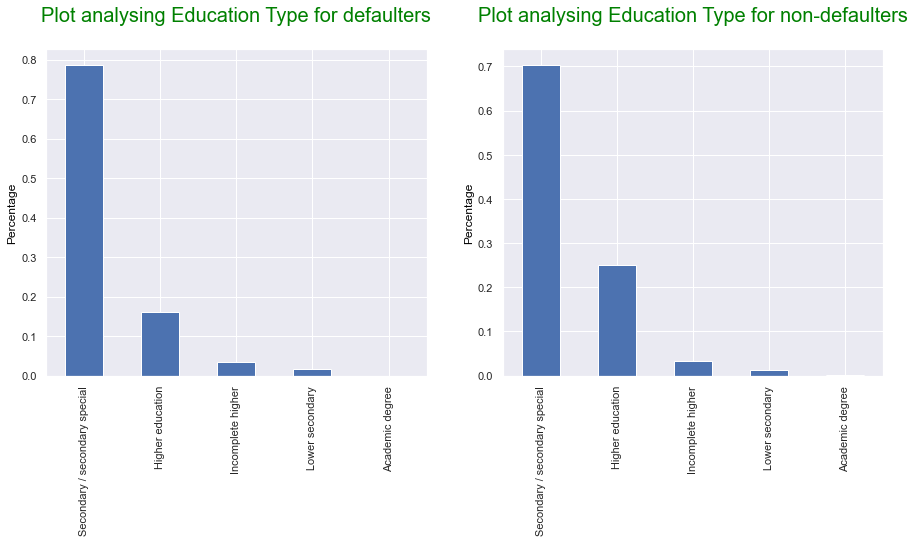

In [143]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
defaulter_adDF["NAME_EDUCATION_TYPE"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Education Type for defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.subplot(1,2,2)
repayer_adDF["NAME_EDUCATION_TYPE"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Education Type for non-defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inferences :**<br>
**1. People with higher education are more in case of non-defaulters than in defaulters.**

**AGE_GROUP variable**

In [144]:
defaulter_adDF["AGE_GROUP"].value_counts(normalize = True)

30-40    0.314667
40-50    0.230527
<30      0.225286
50-60    0.165175
60+      0.064344
Name: AGE_GROUP, dtype: float64

In [145]:
repayer_adDF["AGE_GROUP"].value_counts(normalize = True)

30-40    0.265101
40-50    0.246901
50-60    0.225992
<30      0.152955
60+      0.109052
Name: AGE_GROUP, dtype: float64

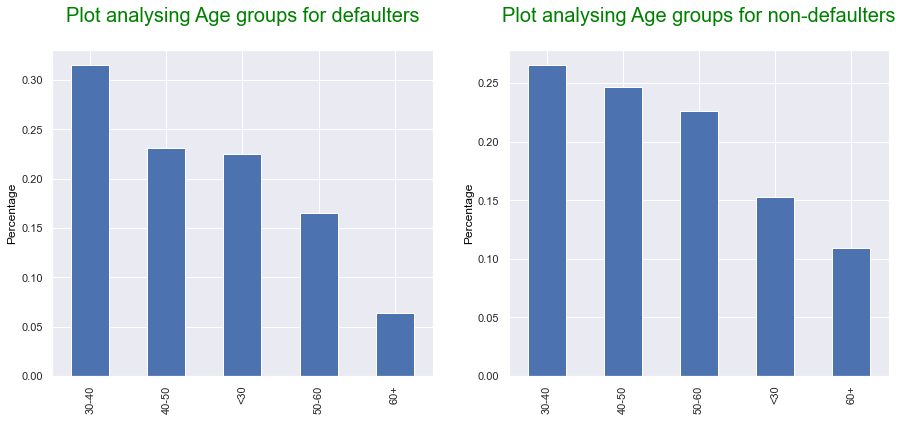

In [146]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
defaulter_adDF["AGE_GROUP"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Age groups for defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.subplot(1,2,2)
repayer_adDF["AGE_GROUP"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Age groups for non-defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inferences:**<br>
**1. People in age group 30-40 years are most and 60+ years are least among all the groups in defaulters.**<br>
**2. People in age group 30-40 years are most and 60+ years are least among all the groups in non-defaulters.**

**EMPLOYED_PERIOD variable**

In [147]:
defaulter_adDF["EMPLOYED_PERIOD"].value_counts(normalize = True)

<5       0.593143
5-10     0.180606
35+      0.126252
10-15    0.059276
15-20    0.020488
20-25    0.011864
25-30    0.005385
30-35    0.002987
Name: EMPLOYED_PERIOD, dtype: float64

In [148]:
repayer_adDF["EMPLOYED_PERIOD"].value_counts(normalize = True)

<5       0.441805
5-10     0.203652
35+      0.194602
10-15    0.087155
15-20    0.035249
20-25    0.020241
25-30    0.010855
30-35    0.006441
Name: EMPLOYED_PERIOD, dtype: float64

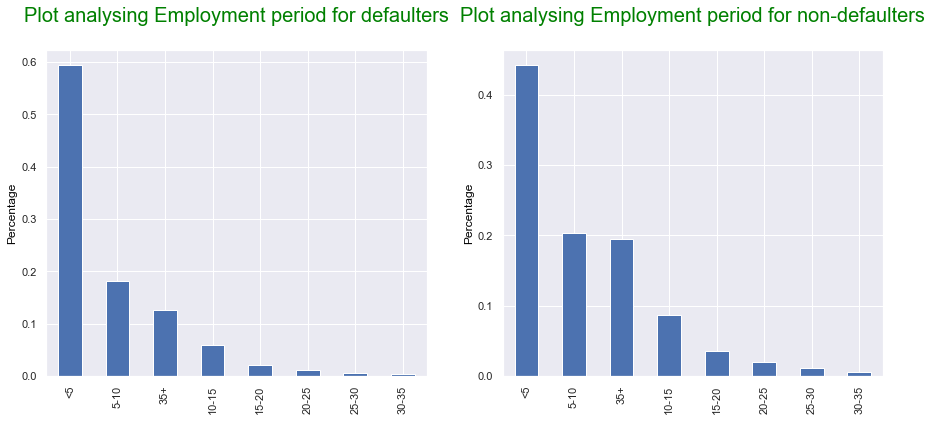

In [149]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
defaulter_adDF["EMPLOYED_PERIOD"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Employment period for defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.subplot(1,2,2)
repayer_adDF["EMPLOYED_PERIOD"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Employment period for non-defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inferences:**<br>
**Newly experienced people (less than 5 years of employment experience are at more risk of default.**

**REGION_RATING_CLIENT variable**

In [150]:
defaulter_adDF["REGION_RATING_CLIENT"].value_counts(normalize = True)

2    0.721174
3    0.216255
1    0.062571
Name: REGION_RATING_CLIENT, dtype: float64

In [151]:
repayer_adDF["REGION_RATING_CLIENT"].value_counts(normalize = True)

2    0.739566
3    0.151999
1    0.108435
Name: REGION_RATING_CLIENT, dtype: float64

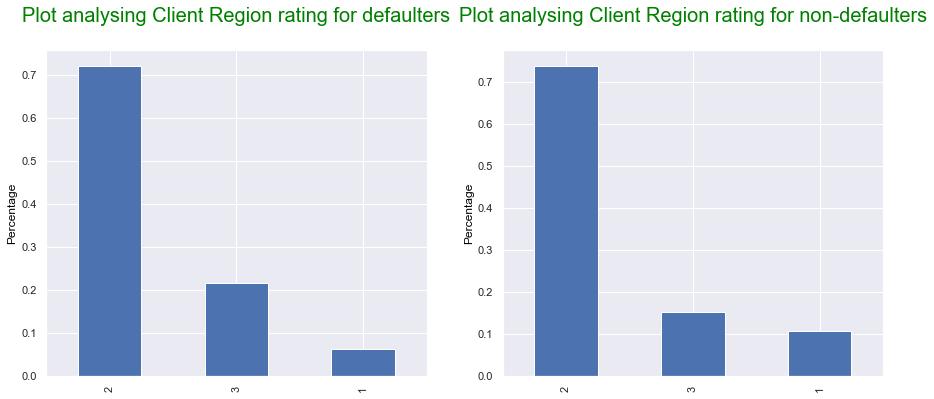

In [152]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
defaulter_adDF["REGION_RATING_CLIENT"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Client Region rating for defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.subplot(1,2,2)
repayer_adDF["REGION_RATING_CLIENT"].value_counts(normalize = True).plot.bar()
plt.title("Plot analysing Client Region rating for non-defaulters\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inferences:**<br>
**More % of defaulters live in region 3**

---

### 11. Bivariate Analysis : We perform this analysis on application_data dataset.

#### 11.1. Numeric - numeric analysis

**Loan Annuity v/s Loan Amount plot**

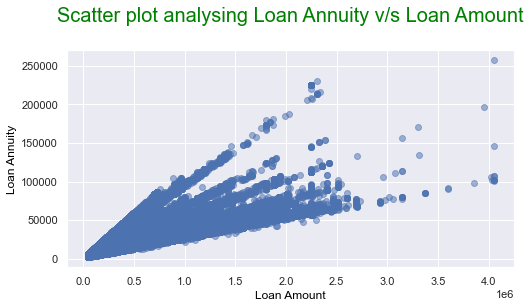

In [153]:
plt.figure(figsize= [8,4])
plt.scatter(adDF["AMT_CREDIT"], adDF["AMT_ANNUITY"], alpha = 0.5)
plt.title("Scatter plot analysing Loan Annuity v/s Loan Amount\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Loan Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Loan Annuity", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

**Inference : More the loan amount, more is the annuity.**

**Goods price v/s Loan amount plot**

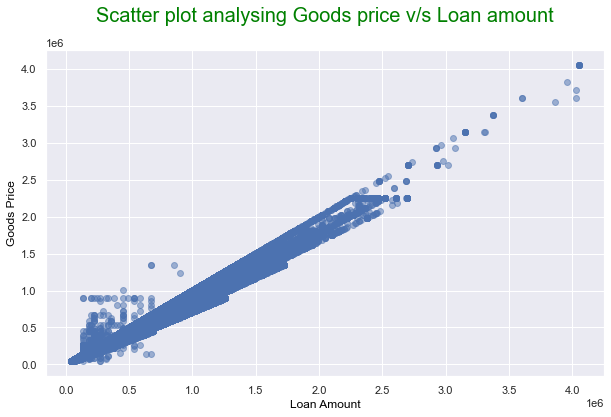

In [154]:
plt.figure(figsize= [10,6])
plt.scatter(adDF["AMT_CREDIT"], adDF["AMT_GOODS_PRICE"], alpha = 0.5)
plt.title("Scatter plot analysing Goods price v/s Loan amount\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Loan Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Goods Price", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

**Inference : Higher the loan amount, higher is the value of underlying security.**

**Loan Annuity v/s Goods amount**

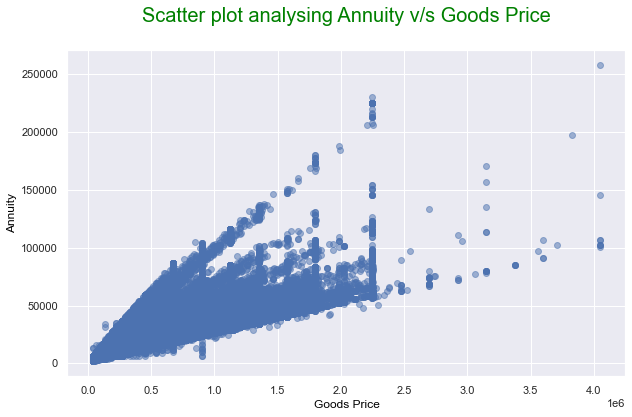

In [155]:
plt.figure(figsize= [10,6])
plt.scatter(adDF["AMT_GOODS_PRICE"], adDF["AMT_ANNUITY"], alpha = 0.5)
plt.title("Scatter plot analysing Annuity v/s Goods Price\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Goods Price", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Annuity", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

**Inference  - Higher Goods Price, higher the annuity**

**Loan amount v/s Total Income**

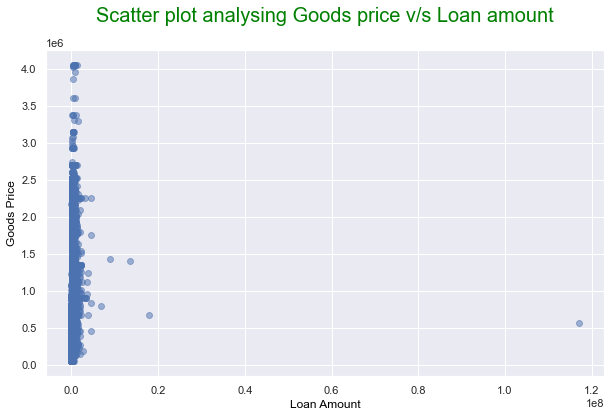

In [156]:
plt.figure(figsize= [10,6])
plt.scatter(adDF["AMT_INCOME_TOTAL"], adDF["AMT_CREDIT"], alpha = 0.5)
plt.title("Scatter plot analysing Goods price v/s Loan amount\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Loan Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Goods Price", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

**Inference : No trend as such**

#### 11.2. Numerical - Categorical variable analysis

**Income v/s Target -**

In [157]:
adDF.groupby("TARGET")["AMT_INCOME_TOTAL"].mean()

TARGET
0    169111.133464
1    165660.718614
Name: AMT_INCOME_TOTAL, dtype: float64

In [158]:
adDF.groupby("TARGET")["AMT_INCOME_TOTAL"].median()

TARGET
0    148500.0
1    135000.0
Name: AMT_INCOME_TOTAL, dtype: float64

<Figure size 720x432 with 0 Axes>

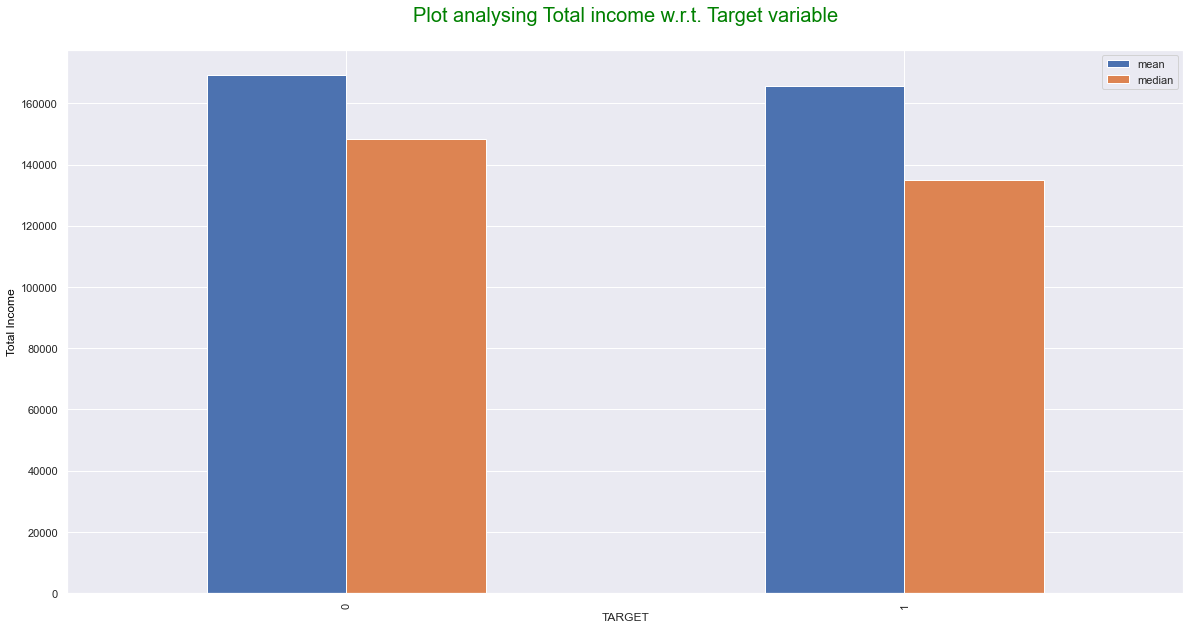

In [159]:
plt.figure(figsize = (10,6))
adDF.groupby(by = "TARGET")["AMT_INCOME_TOTAL"].aggregate(['mean', 'median']).plot.bar()
plt.title("Plot analysing Total income w.r.t. Target variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Total Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference : Mean and Median values show that income of repayers is more than that of defaulters**

**Loan amount v/s Target.**

In [160]:
adDF.groupby("TARGET")["AMT_CREDIT"].mean()

TARGET
0    602941.560628
1    558039.406930
Name: AMT_CREDIT, dtype: float64

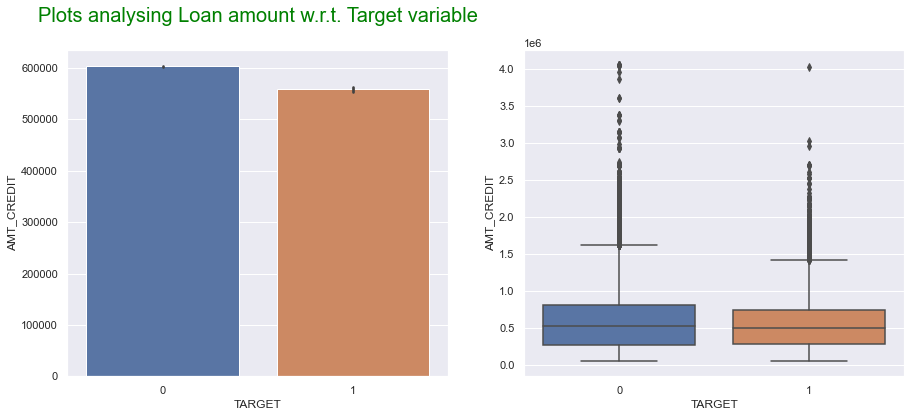

In [161]:
plt.figure(figsize= (15,6))
plt.subplot(1,2,1)
sns.barplot(adDF["TARGET"], adDF["AMT_CREDIT"])
plt.title("Plots analysing Loan amount w.r.t. Target variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.subplot(1,2,2)
sns.boxplot(adDF["TARGET"], adDF["AMT_CREDIT"])
plt.show()

**Inference : Even if there is an imbalance between the customers with payment difficulties (1) and other cases (0), the average loan amounts to these two sections are very close.**

**Target v/s Count of children**

In [162]:
adDF.groupby("TARGET")["CNT_CHILDREN"].mean()

TARGET
0    0.412865
1    0.463796
Name: CNT_CHILDREN, dtype: float64

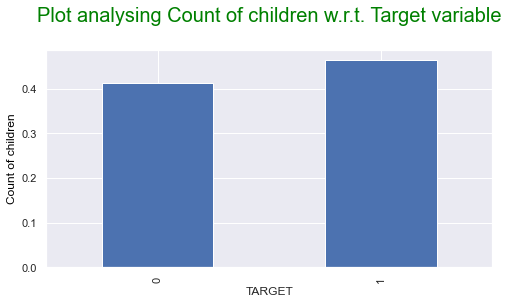

In [163]:
plt.figure(figsize= (8,4))
adDF.groupby("TARGET")["CNT_CHILDREN"].mean().plot.bar()
plt.title("Plot analysing Count of children w.r.t. Target variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of children", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference : Count of children is more among defaulters than non-defaulters**

**Target v/s Count of family members**

In [164]:
adDF.groupby("TARGET")["CNT_FAM_MEMBERS"].mean()

TARGET
0    2.150115
1    2.181221
Name: CNT_FAM_MEMBERS, dtype: float64

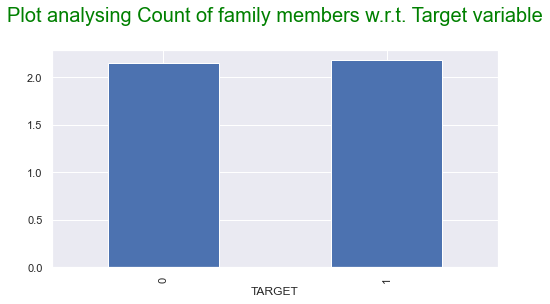

In [165]:
plt.figure(figsize= (8,4))
adDF.groupby("TARGET")["CNT_FAM_MEMBERS"].mean().plot.bar()
plt.title("Plot analysing Count of family members w.r.t. Target variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

**Inference : Count of family members is more among defaulters than non-defaulters**

**Loan Type v/s Loan amount.**


In [166]:
adDF.groupby("NAME_CONTRACT_TYPE")["AMT_CREDIT"].mean()

NAME_CONTRACT_TYPE
Cash loans         627968.410529
Revolving loans    324443.467467
Name: AMT_CREDIT, dtype: float64

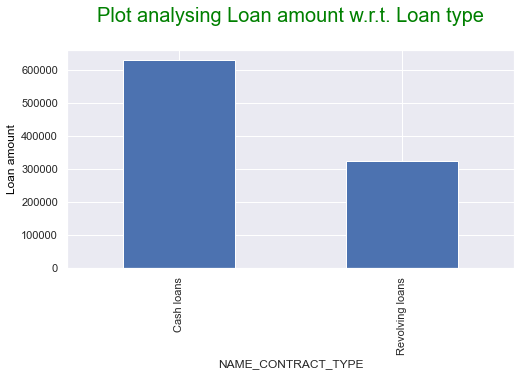

In [167]:
plt.figure(figsize= (8,4))
adDF.groupby("NAME_CONTRACT_TYPE")["AMT_CREDIT"].mean().plot.bar()
plt.title("Plot analysing Loan amount w.r.t. Loan type\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Loan amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference : Due to imbalance between loan types - 90.5% loans are cash loans(or can be called as term loans) while only 9.4% are revolving loans(or can be called as overdraft loans), cash loans amounts are more than Revolving loans amounts**

**Gender and Loan amount.**

In [168]:
adDF.groupby("CODE_GENDER")["AMT_CREDIT"].mean()

CODE_GENDER
F    593067.32153
M    611357.24960
Name: AMT_CREDIT, dtype: float64

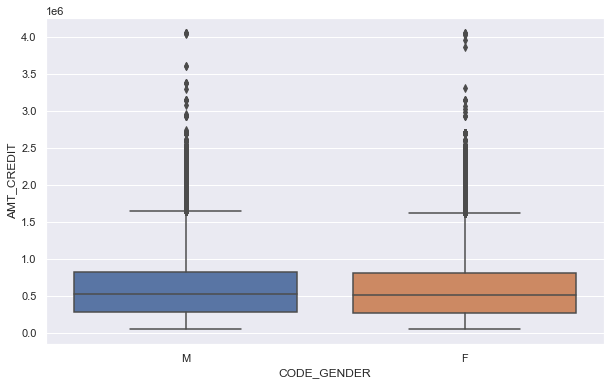

In [169]:
plt.figure(figsize= (10,6))
sns.boxplot(adDF["CODE_GENDER"], adDF["AMT_CREDIT"])
plt.show()

**Inference :  Even if there is an imbalance in the data with respect to gender, the average loan amounts to these two categories is approximately same.**

**Education v/s Income.**

In [170]:
adDF.groupby("NAME_EDUCATION_TYPE")["AMT_INCOME_TOTAL"].mean()

NAME_EDUCATION_TYPE
Academic degree                  240009.146341
Higher education                 208686.089670
Incomplete higher                181622.472238
Lower secondary                  129996.283316
Secondary / secondary special    155194.215519
Name: AMT_INCOME_TOTAL, dtype: float64

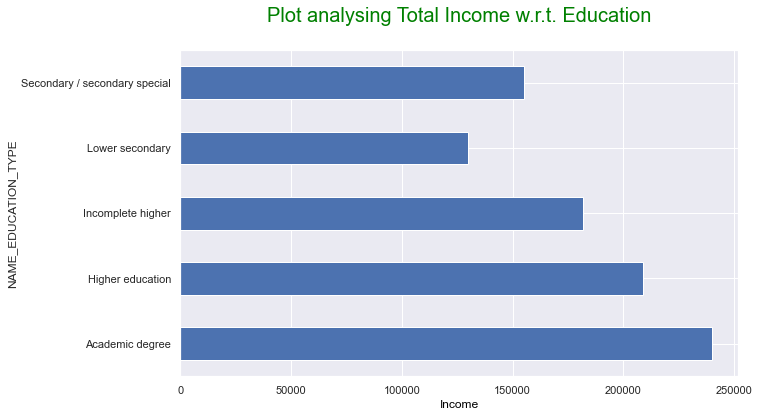

In [171]:
plt.figure(figsize= (10,6))
adDF.groupby("NAME_EDUCATION_TYPE")["AMT_INCOME_TOTAL"].mean().plot.barh()
plt.title("Plot analysing Total Income w.r.t. Education\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference :  Customers with Academic Degree have high income.**

**Family Status and Income**

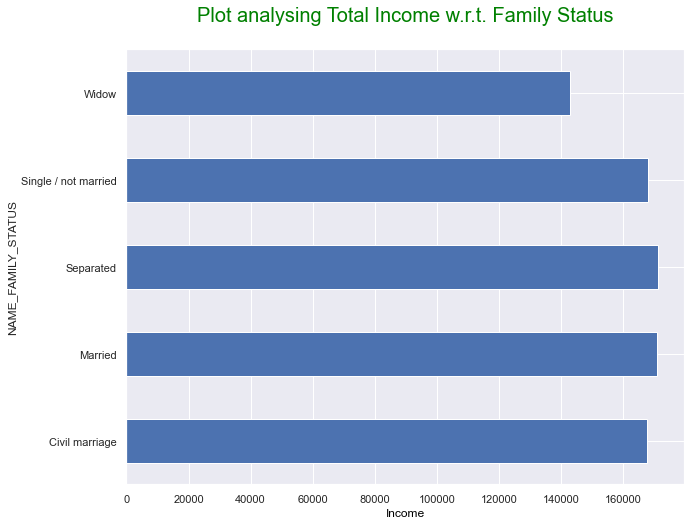

In [172]:
plt.figure(figsize= (10,8))
adDF.groupby("NAME_FAMILY_STATUS")["AMT_INCOME_TOTAL"].mean().plot.barh()
plt.title("Plot analysing Total Income w.r.t. Family Status\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Income Type v/s Total Income.**

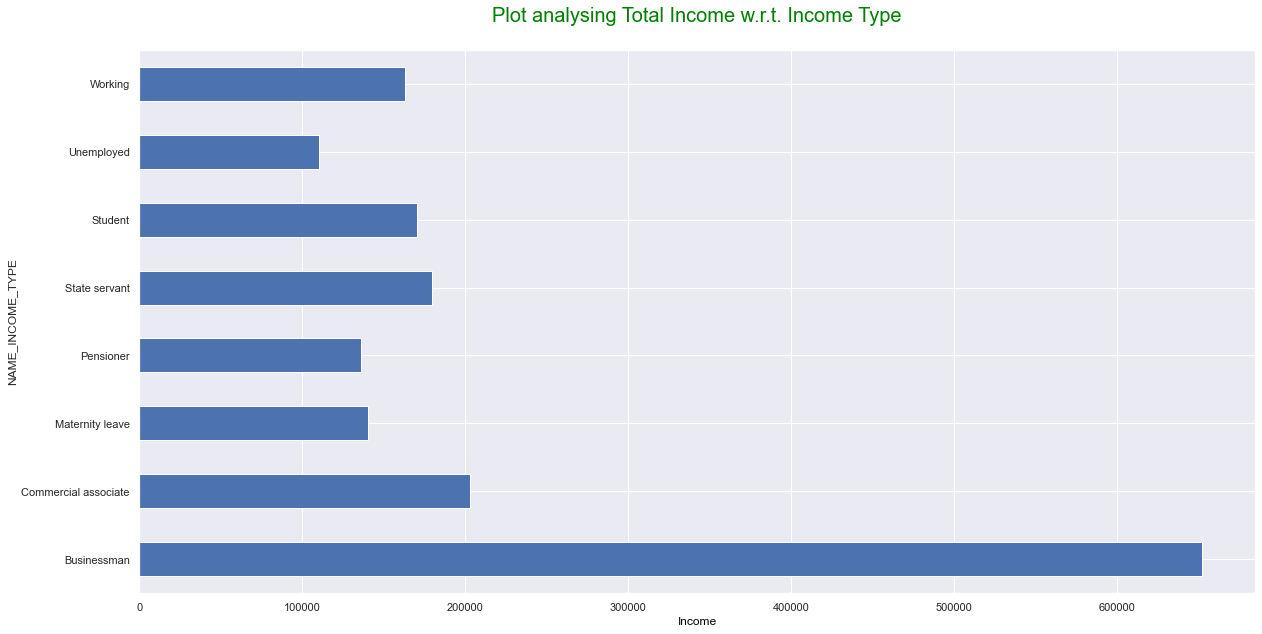

In [173]:
adDF.groupby("NAME_INCOME_TYPE")["AMT_INCOME_TOTAL"].mean().plot.barh()
plt.title("Plot analysing Total Income w.r.t. Income Type\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference:  Business persons have highest income among all the customers.**

**Housing Type v/s Loan amount.**

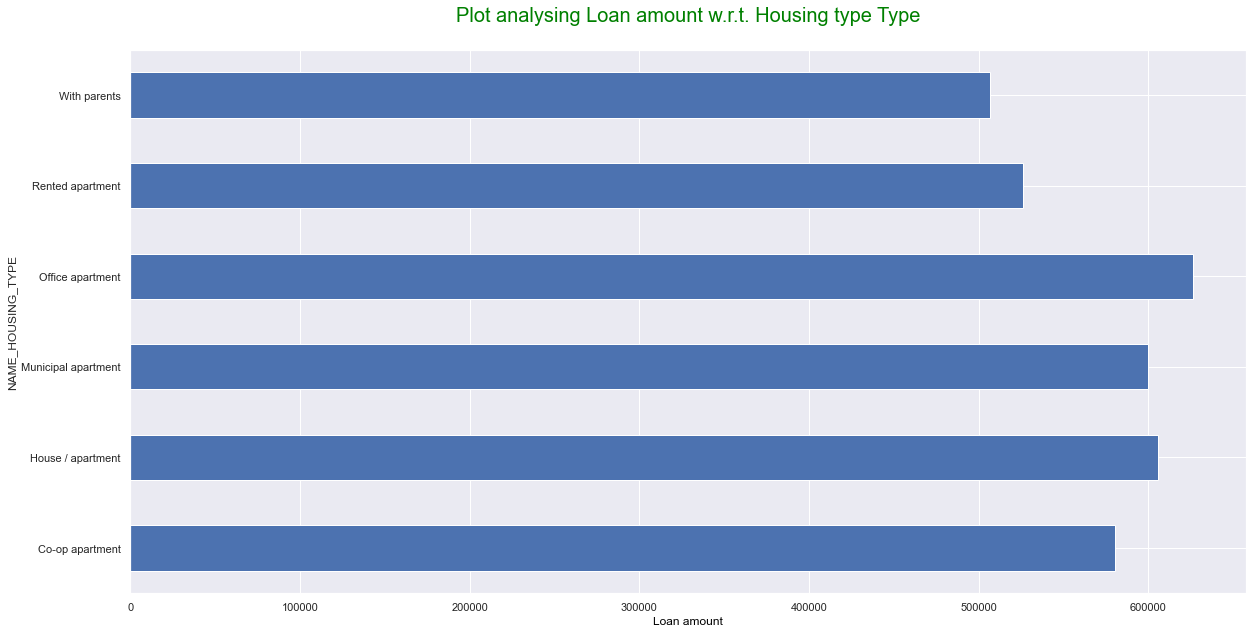

In [174]:
adDF.groupby("NAME_HOUSING_TYPE")["AMT_CREDIT"].mean().plot.barh()
plt.title("Plot analysing Loan amount w.r.t. Housing type Type\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Loan amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

 **Inference : Customers staying in Office apartments or quarters have taken higher loans.**

**Education v/s Loan amount.**

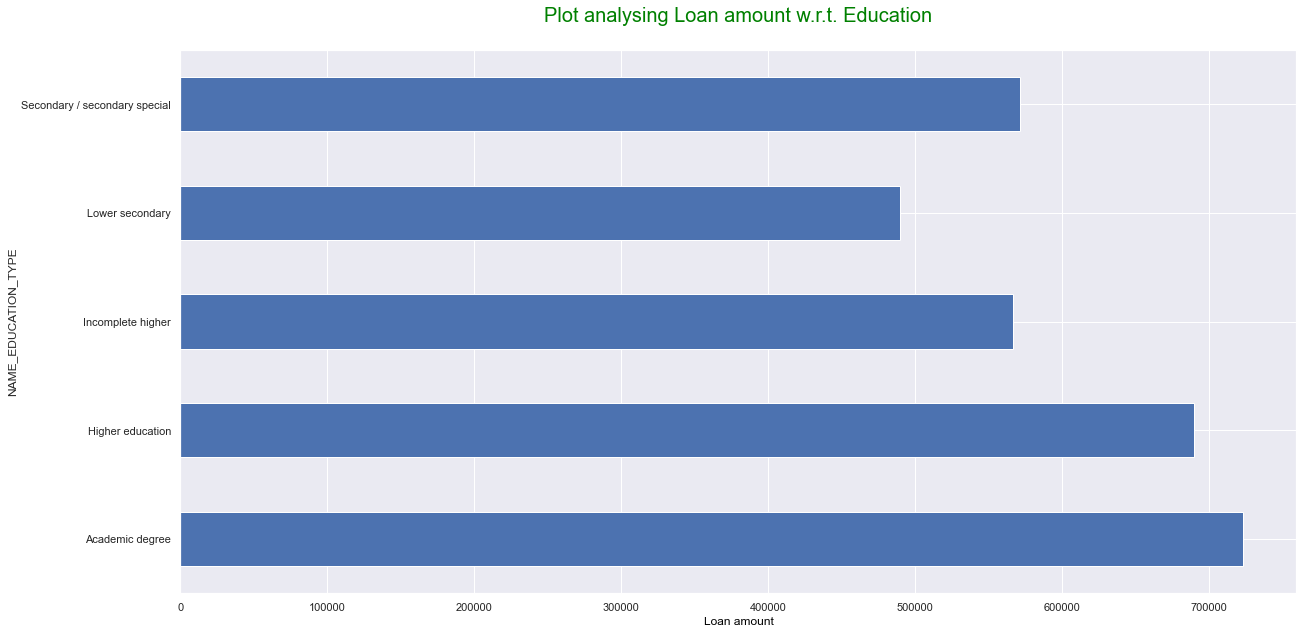

In [175]:
adDF.groupby("NAME_EDUCATION_TYPE")["AMT_CREDIT"].mean().plot.barh()
plt.title("Plot analysing Loan amount w.r.t. Education\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Loan amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

 **Inference : Since customers with academic degree have high incomes, they have higher loans as well.**

**Age group v/s income.**

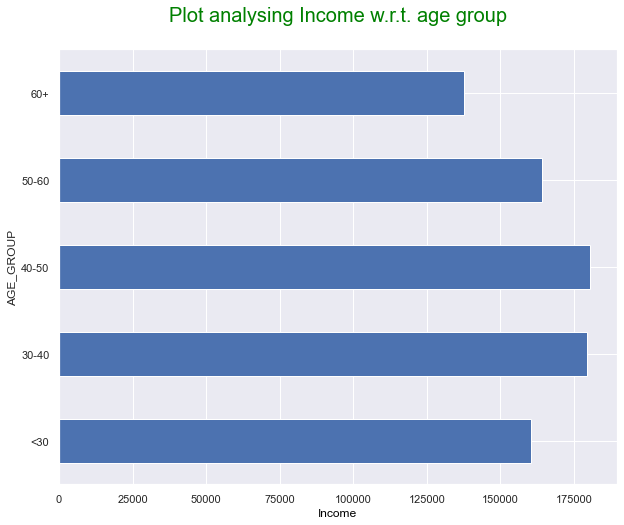

In [176]:
plt.figure(figsize= (10,8))
adDF.groupby("AGE_GROUP")["AMT_INCOME_TOTAL"].mean().plot.barh()
plt.title("Plot analysing Income w.r.t. age group\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

 **Inference : People between 40-50 years of age have higher income**

**Age group v/s Loan amount.**

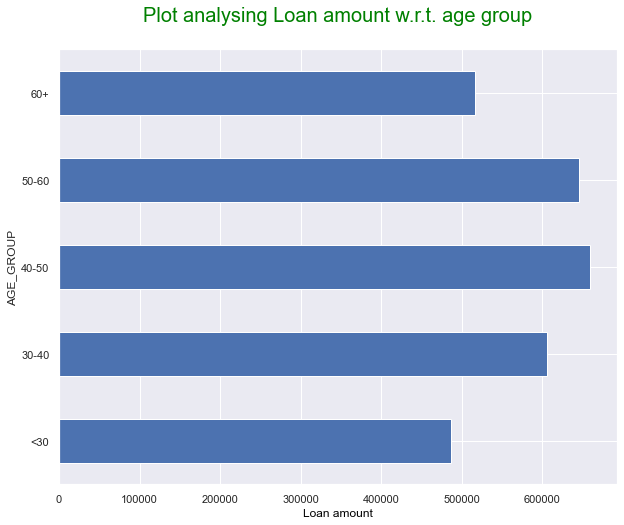

In [177]:
plt.figure(figsize= (10,8))
adDF.groupby("AGE_GROUP")["AMT_CREDIT"].mean().plot.barh()
plt.title("Plot analysing Loan amount w.r.t. age group\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Loan amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

 **Inference : Hence people between 40-50 years of age have higher loans.**

**Employed period v/s Income.**

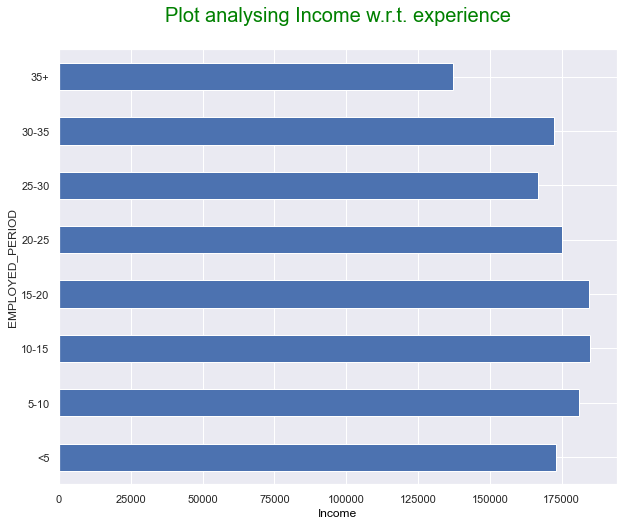

In [178]:
plt.figure(figsize= (10,8))
adDF.groupby("EMPLOYED_PERIOD")["AMT_INCOME_TOTAL"].mean().plot.barh()
plt.title("Plot analysing Income w.r.t. experience\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

 **Inference : People between 10-20 years of experience have higher incomes**

**Employed period v/s Loan amount**

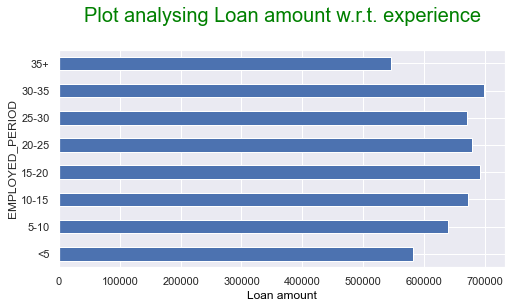

In [179]:
plt.figure(figsize= (8,4))
adDF.groupby("EMPLOYED_PERIOD")["AMT_CREDIT"].mean().plot.barh()
plt.title("Plot analysing Loan amount w.r.t. experience\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Loan amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Occupation Type v/s Income**

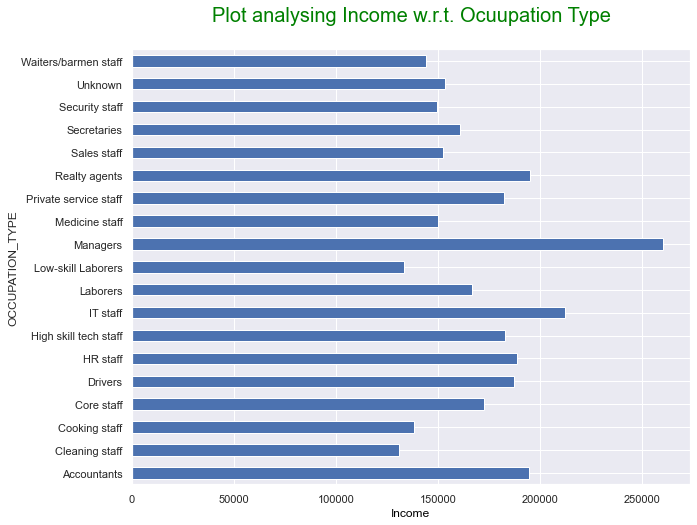

In [180]:
plt.figure(figsize= (10,8))
adDF.groupby("OCCUPATION_TYPE")["AMT_INCOME_TOTAL"].mean().plot.barh()
plt.title("Plot analysing Income w.r.t. Ocuupation Type\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference : Managers cadre people have highest income.**

**Occupation type v/s Loan amount**

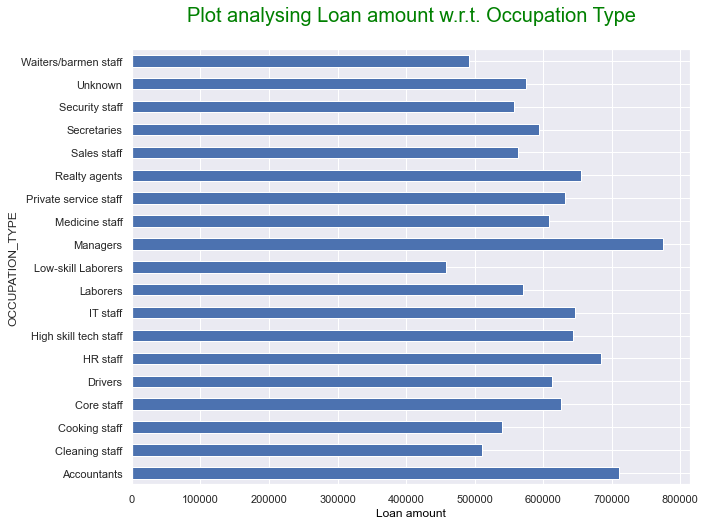

In [181]:
plt.figure(figsize= (10,8))
adDF.groupby("OCCUPATION_TYPE")["AMT_CREDIT"].mean().plot.barh()
plt.title("Plot analysing Loan amount w.r.t. Occupation Type\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Loan amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference : Hence managers have high loans**

### 11.3  Categorical categorical variable analysis : We have already done segmented univariate analysis for defaulters and non-defaulters. But amongst defaulters what are the trends we observe. Let's see.


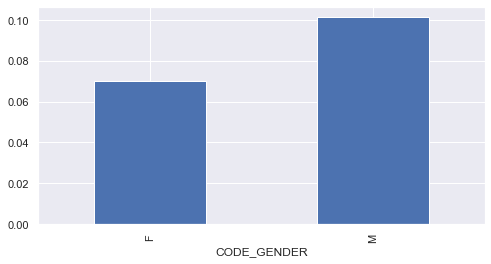

In [182]:
plt.figure(figsize= (8,4))
adDF.groupby("CODE_GENDER")["TARGET"].mean().plot.bar()
plt.show()

**Inference : Gender and Target - Even if there are 66% of female customers as compared to 34% male customers , females are good repayers as compared to males.**

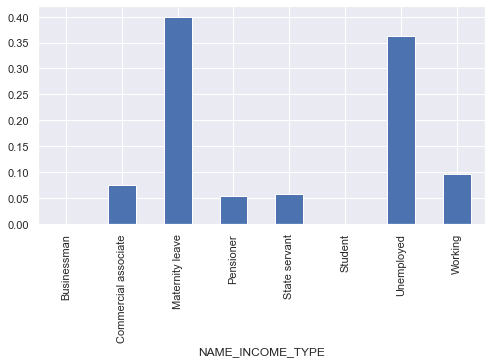

In [183]:
plt.figure(figsize= (8,4))
adDF.groupby("NAME_INCOME_TYPE")["TARGET"].mean().plot.bar()
plt.show()

**Inference : Income Type and Target - Customers in maternity leave and unemployed customers have less chances of loan repayment.**

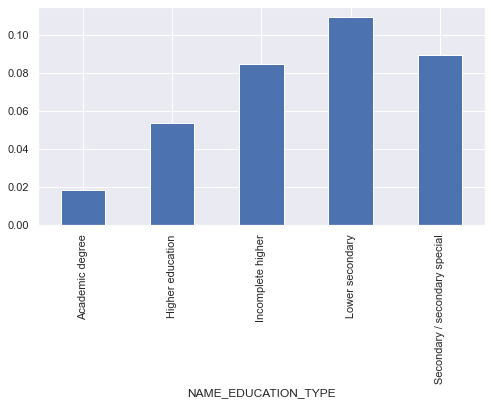

In [184]:
plt.figure(figsize= (8,4))
adDF.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().plot.bar()
plt.show()

**Inference : Education and Target - Less educated customers have less chances of repayment**

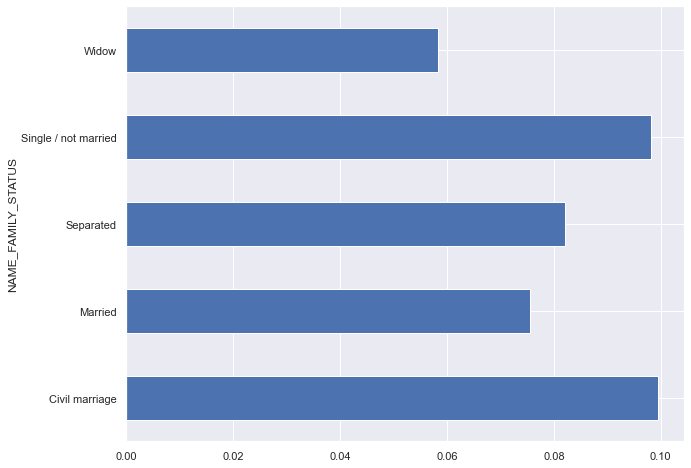

In [185]:
plt.figure(figsize = (10,8))
adDF.groupby("NAME_FAMILY_STATUS")["TARGET"].mean().plot.barh()
plt.show()

**Inference : Family status and Target - Single/unmarried persons and customers who had civil marriage are risky.**

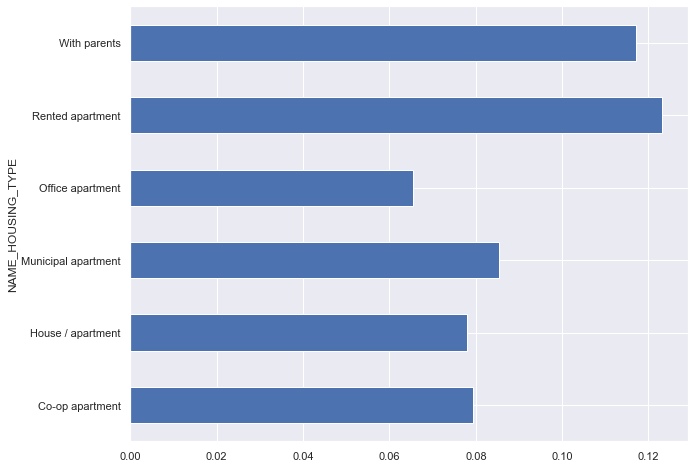

In [186]:
plt.figure(figsize = (10,8))
adDF.groupby("NAME_HOUSING_TYPE")["TARGET"].mean().plot.barh()
plt.show()

 **Inference : Housing Type and Target - Persons staying on rent and those staying with parents are at more risk of non-repayment of loan**

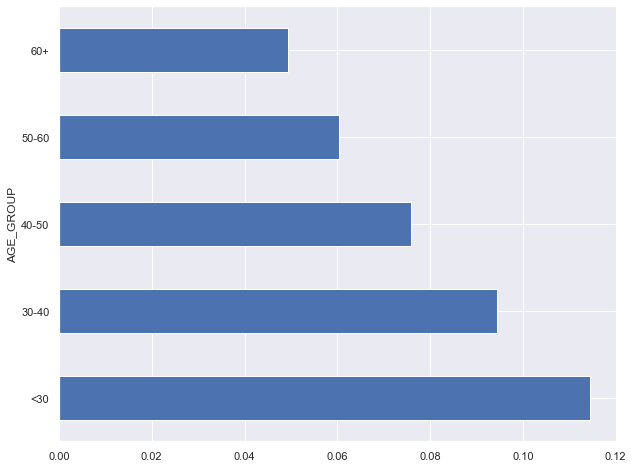

In [187]:
plt.figure(figsize = (10,8))
adDF.groupby("AGE_GROUP")["TARGET"].mean().plot.barh()
plt.show()

**Inference : Age group and Target. Customers less than 30 years of age may face more repayment difficulty**

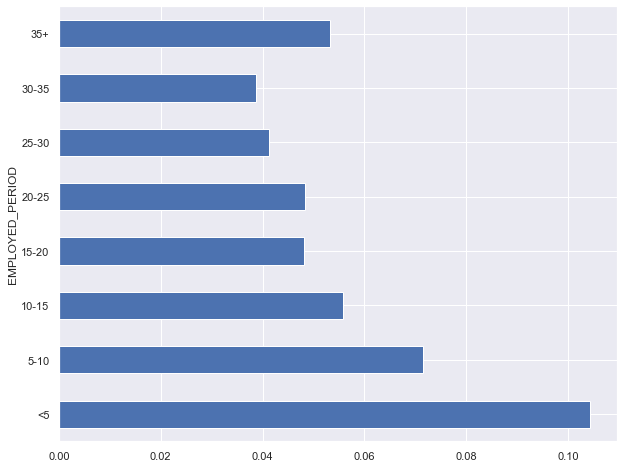

In [188]:
plt.figure(figsize = (10,8))
adDF.groupby("EMPLOYED_PERIOD")["TARGET"].mean().plot.barh()
plt.show()

**Inference : Employed period and Target. Freshers or newly employed customers may face more repayment difficulty.**

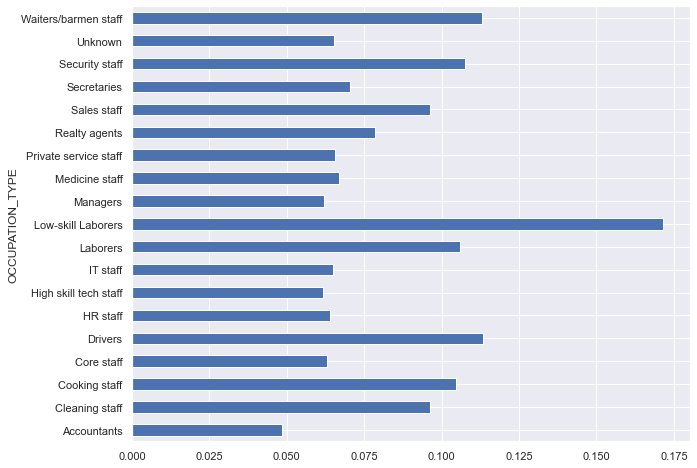

In [189]:
plt.figure(figsize=(10,8))
adDF.groupby("OCCUPATION_TYPE")["TARGET"].mean().plot.barh()
plt.show()

**Inference : Occupation type and Target. Low skill labourers are at high risk of default.**

----

## 12. Multivariate Analysis

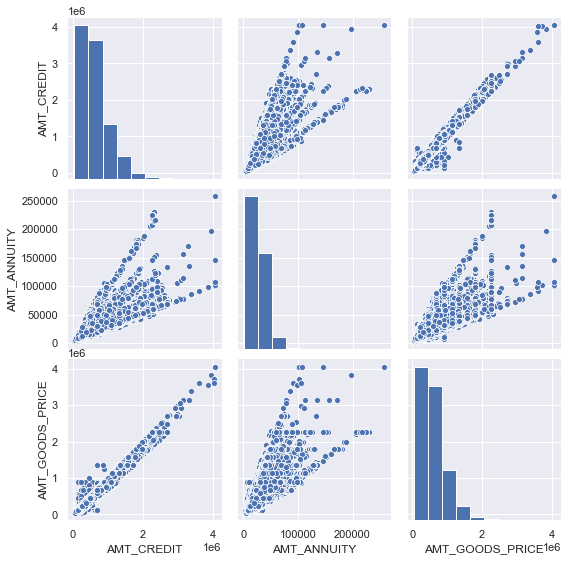

In [190]:
# Loan amount v/s Annuity v/s Goods Price
sns.pairplot(data = adDF, vars = ["AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"])
plt.show()

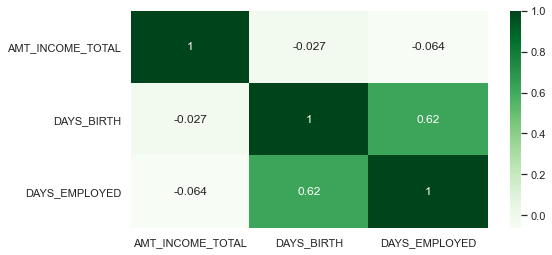

In [191]:
# Income v/s Age v/s Experience
plt.figure(figsize= (8,4))
sns.heatmap(adDF[["AMT_INCOME_TOTAL","DAYS_BIRTH","DAYS_EMPLOYED"]].corr(), cmap = "Greens", annot = True)
plt.show()

In [192]:
# Education v/s family Status v/s Target
edu_fam = pd.pivot_table(data = adDF, index = "NAME_EDUCATION_TYPE", columns = "NAME_FAMILY_STATUS", values = "TARGET")
edu_fam

NAME_FAMILY_STATUS             Civil marriage   Married  Separated  Single / not married     Widow
NAME_EDUCATION_TYPE                                                                               
Academic degree                      0.000000  0.018868   0.000000              0.034483  0.000000
Higher education                     0.066239  0.049651   0.057392              0.062043  0.048094
Incomplete higher                    0.092561  0.079079   0.086643              0.094211  0.063584
Lower secondary                      0.136253  0.103008   0.138249              0.133218  0.067961
Secondary / secondary special        0.108330  0.084128   0.089962              0.113272  0.059730

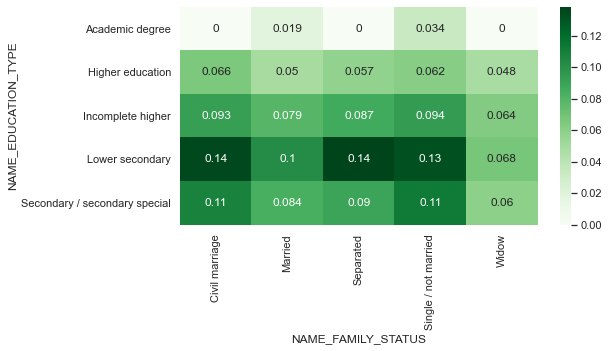

In [193]:
plt.figure(figsize= (8,4))
sns.heatmap(edu_fam, cmap = "Greens", annot = True)
plt.show()

**Inference - Less educated Single/Separated and people who had civil marriage are at risk of default**

In [194]:
# Gender v/s Education v/s Target
gen_edu = pd.pivot_table(data = adDF, index = "CODE_GENDER", columns = "NAME_INCOME_TYPE", values = "TARGET")
gen_edu

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  Pensioner  State servant  Student  Unemployed   Working
CODE_GENDER                                                                                                                  
F                         0.0              0.066671              0.5   0.049534       0.053363      0.0    0.352941  0.083716
M                         0.0              0.088294              0.0   0.073190       0.068812      0.0    0.400000  0.114949

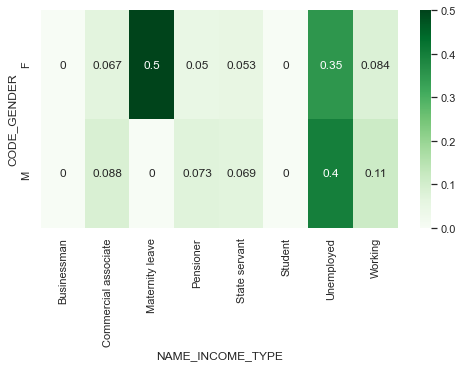

In [195]:
plt.figure(figsize= (8,4))
sns.heatmap(gen_edu, cmap = "Greens", annot = True)
plt.show()

**Inference - Women on Maternity leave and both unemployed men and women are at risk of default**

In [196]:
#Education v/s Income Type v/s Target
edu_in = pd.pivot_table(data = adDF, index = "NAME_EDUCATION_TYPE", columns = "NAME_INCOME_TYPE", values = "TARGET")
edu_in

NAME_INCOME_TYPE               Businessman  Commercial associate  Maternity leave  Pensioner  State servant  Student  Unemployed   Working
NAME_EDUCATION_TYPE                                                                                                                       
Academic degree                        NaN              0.023256              NaN   0.000000       0.000000      NaN         NaN  0.027778
Higher education                       0.0              0.051700              0.0   0.041539       0.038857      0.0    0.000000  0.061703
Incomplete higher                      NaN              0.082083              NaN   0.044402       0.067620      0.0    0.333333  0.092539
Lower secondary                        NaN              0.122004              NaN   0.066710       0.078431      NaN         NaN  0.145761
Secondary / secondary special          NaN              0.086574              1.0   0.055788       0.070662      0.0    0.538462  0.105203

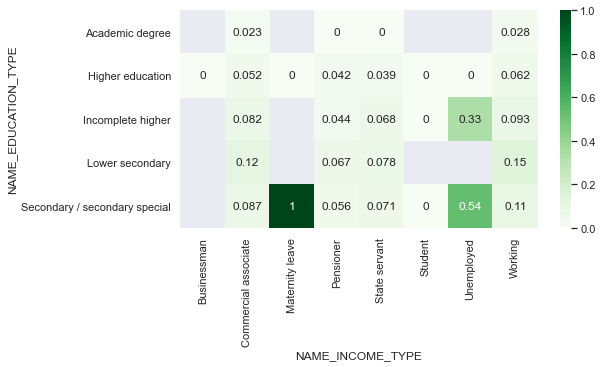

In [197]:
plt.figure(figsize= (8,4))
sns.heatmap(edu_in, cmap = "Greens", annot = True)
plt.show()

**Inference - Clearly women on maternity leave with secondary education are at high risk of default**

In [198]:
#Age group v/s Income type v/s Target
age_in = pd.pivot_table(data = adDF, index = "AGE_GROUP", columns = "NAME_INCOME_TYPE", values = "TARGET")
age_in

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  Pensioner  State servant  Student  Unemployed   Working
AGE_GROUP                                                                                                                    
<30                       0.0              0.096718              0.0   0.138158       0.083822      0.0        0.25  0.126468
30-40                     0.0              0.079444              1.0   0.110899       0.064057      0.0        0.50  0.104954
40-50                     0.0              0.066028              0.0   0.083874       0.049485      0.0        0.25  0.083447
50-60                     0.0              0.058505              NaN   0.053767       0.040102      0.0        0.00  0.070341
60+                       NaN              0.044236              0.0   0.050151       0.026706      NaN        0.75  0.047920

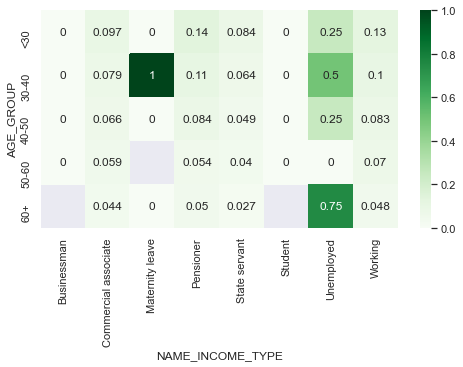

In [199]:
plt.figure(figsize=(8,4))
sns.heatmap(age_in, cmap = "Greens", annot = True)
plt.show()

**Inference - Women in age group 30-40 on maternity leave and 60+ customers are risky**

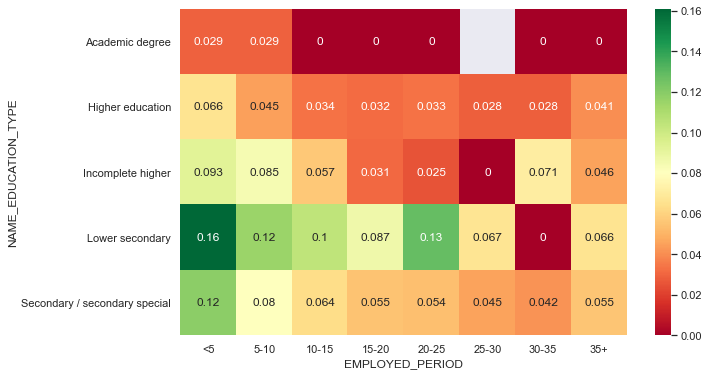

In [200]:
#**Age v/s Employed period v/s Target
edu_emp = pd.pivot_table(data = adDF, index = "NAME_EDUCATION_TYPE", columns = "EMPLOYED_PERIOD", values = "TARGET")
plt.figure(figsize=(10,6))
sns.heatmap(edu_emp, cmap = "RdYlGn", annot = True)
plt.show()

**Inference - Less educated people who are new to work are at risk of default**

In [201]:
# Occupation v/s Education v/s Target
edu_oc = pd.pivot_table(data = adDF, index = "OCCUPATION_TYPE", columns = "NAME_EDUCATION_TYPE" , values = "TARGET")
edu_oc

NAME_EDUCATION_TYPE    Academic degree  Higher education  Incomplete higher  Lower secondary  Secondary / secondary special
OCCUPATION_TYPE                                                                                                            
Accountants                   0.125000          0.038860           0.056180         0.166667                       0.062147
Cleaning staff                0.000000          0.084337           0.102041         0.138889                       0.095755
Cooking staff                 0.000000          0.088993           0.093220         0.171875                       0.105273
Core staff                    0.000000          0.045714           0.083390         0.105691                       0.078612
Drivers                       0.000000          0.083537           0.103870         0.128514                       0.117301
HR staff                           NaN          0.044818           0.083333              NaN                       0.100000
High skill tech staff         0.000000          0.047281           0.070326         0.129032                       0.071475
IT staff                           NaN          0.050000           0.038462         0.000000                       0.113636
Laborers                      0.000000          0.076080           0.086381         0.160494                       0.109828
Low-skill Laborers            0.000000          0.098765           0.200000         0.173913                       0.174258
Managers                      0.000000          0.047971           0.080559         0.089286                       0.078647
Medicine staff                     NaN          0.043086           0.020548         0.116883                       0.070627
Private service staff         0.000000          0.065511           0.043860         0.000000                       0.067433
Realty agents                 0.000000          0.044053           0.191489         0.000000                       0.084388
Sales staff                   0.111111          0.075815           0.103001         0.137168                       0.100165
Secretaries                        NaN          0.062370           0.114583         0.000000                       0.070539
Security staff                0.000000          0.080586           0.153846         0.144330                       0.109475
Unknown                       0.017544          0.048803           0.076598         0.076560                       0.069223
Waiters/barmen staff               NaN          0.089888           0.095745         0.058824                       0.119205

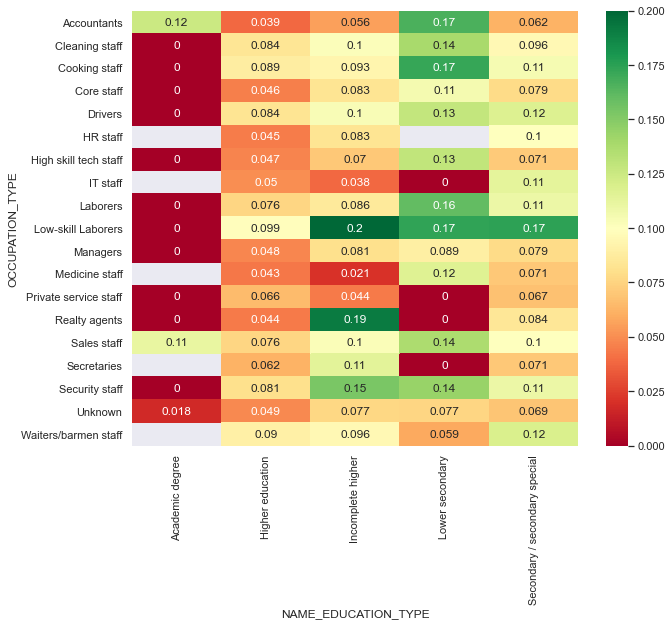

In [202]:
plt.figure(figsize=(10,8))
sns.heatmap(edu_oc, cmap = "RdYlGn", annot = True)
plt.show()

**Inference - Less educated low skill laborers have high risk of default**

In [203]:
# Housing Type v/s Family Status v/s Target 
hou_fam = pd.pivot_table(data = adDF, index = "NAME_HOUSING_TYPE", columns = "NAME_FAMILY_STATUS" , values = "TARGET")
hou_fam

NAME_FAMILY_STATUS   Civil marriage   Married  Separated  Single / not married     Widow
NAME_HOUSING_TYPE                                                                       
Co-op apartment            0.066667  0.062038   0.153846              0.112319  0.037037
House / apartment          0.096297  0.073594   0.078169              0.094624  0.057313
Municipal apartment        0.103741  0.080301   0.088819              0.097756  0.066327
Office apartment           0.096916  0.061957   0.063584              0.065617  0.056075
Rented apartment           0.136364  0.115875   0.141176              0.130259  0.074468
With parents               0.135102  0.113333   0.117647              0.116314  0.111111

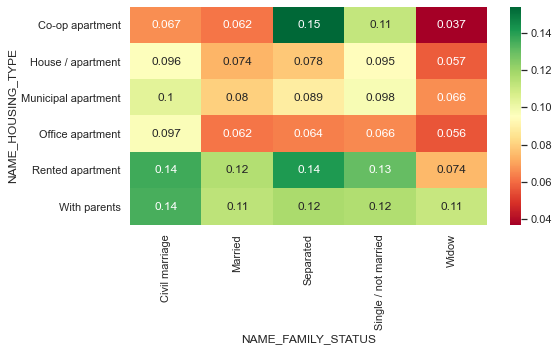

In [204]:
plt.figure(figsize=(8,4))
sns.heatmap(hou_fam, cmap = "RdYlGn", annot = True)
plt.show()

**Inference - People living in rented apartments and separated people living in co-op apartments are at more risk of default**

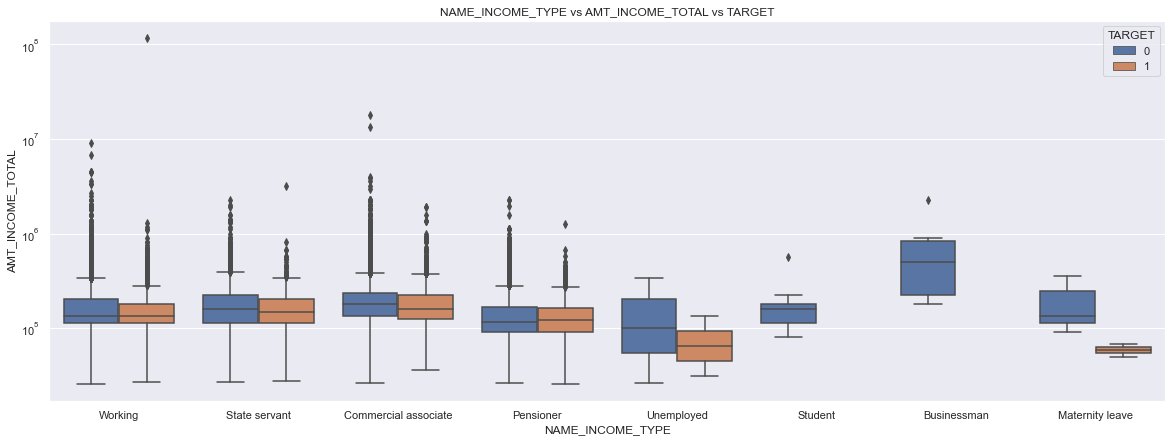

In [205]:
# NAME_INCOME_TYPE vs AMT_INCOME_TOTAL vs TARGET
plt.figure(figsize=(20,7))
sns.boxplot(data =adDF, x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL', hue ='TARGET', orient='v')
plt.title('NAME_INCOME_TYPE vs AMT_INCOME_TOTAL vs TARGET')
plt.yscale('log')
plt.show()

**Inference : Business people have high income and mostly repay the loans.**

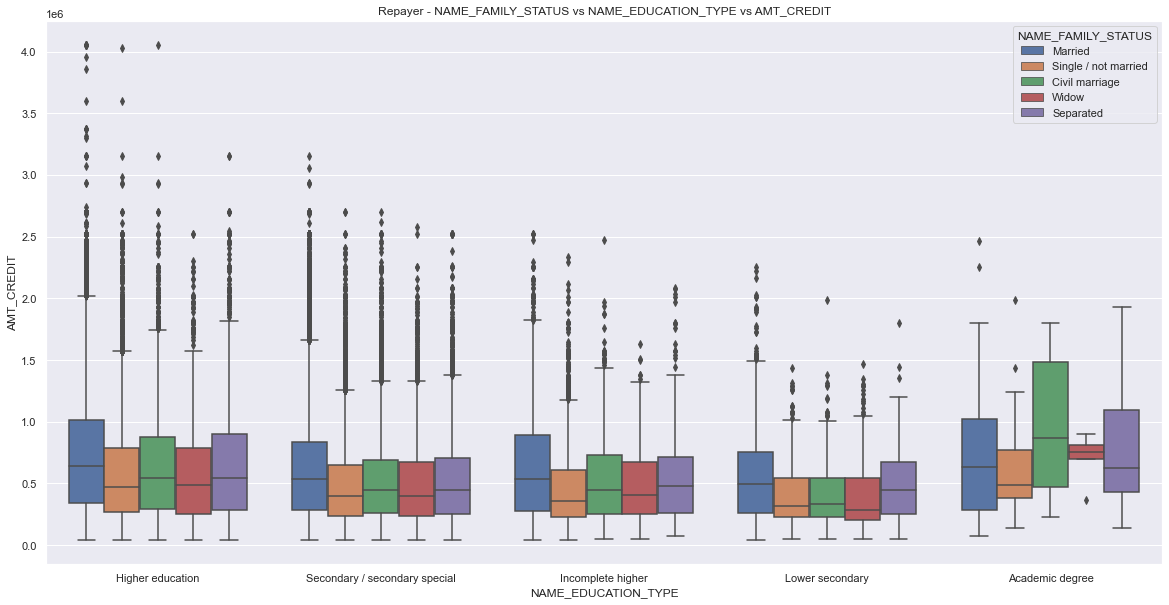

In [206]:
# Repayers - NAME_FAMILY_STATUS vs NAME_EDUCATION_TYPE vs AMT_CREDIT
sns.boxplot(data =repayer_adDF, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS', orient='v')
plt.title('Repayer - NAME_FAMILY_STATUS vs NAME_EDUCATION_TYPE vs AMT_CREDIT')
plt.show()

**Inference : Married people with all education levels have higher loan amounts**

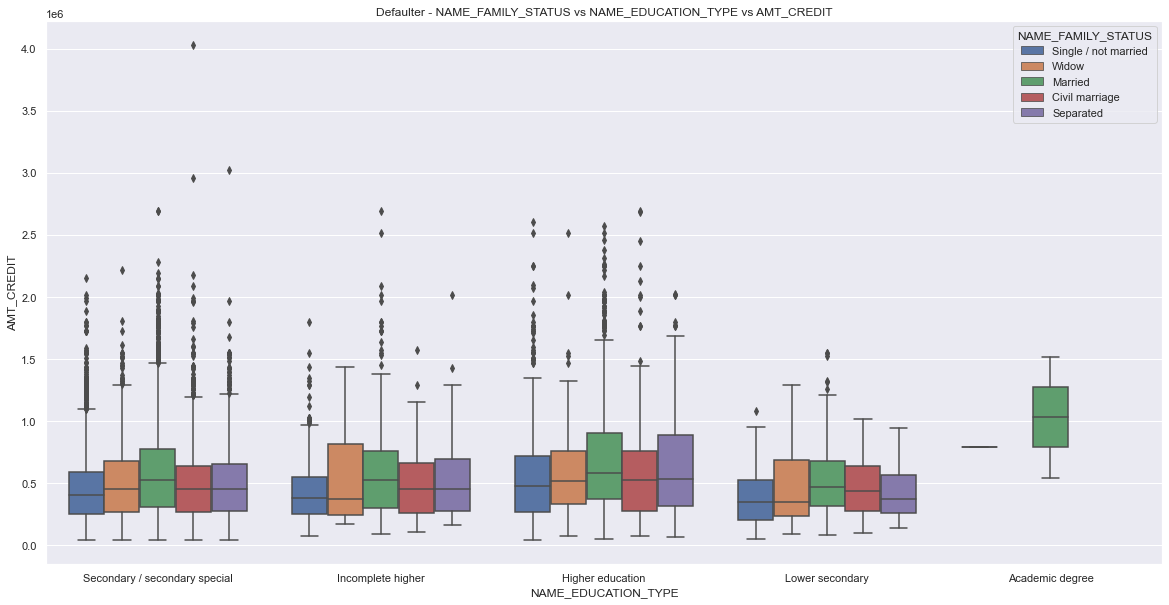

In [207]:
# Defaulters - NAME_FAMILY_STATUS vs NAME_EDUCATION_TYPE vs AMT_CREDIT
sns.boxplot(data =defaulter_adDF, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS', orient='v')
plt.title('Defaulter - NAME_FAMILY_STATUS vs NAME_EDUCATION_TYPE vs AMT_CREDIT')
plt.show()

**Inference - Less educated married people are at more risk of default**

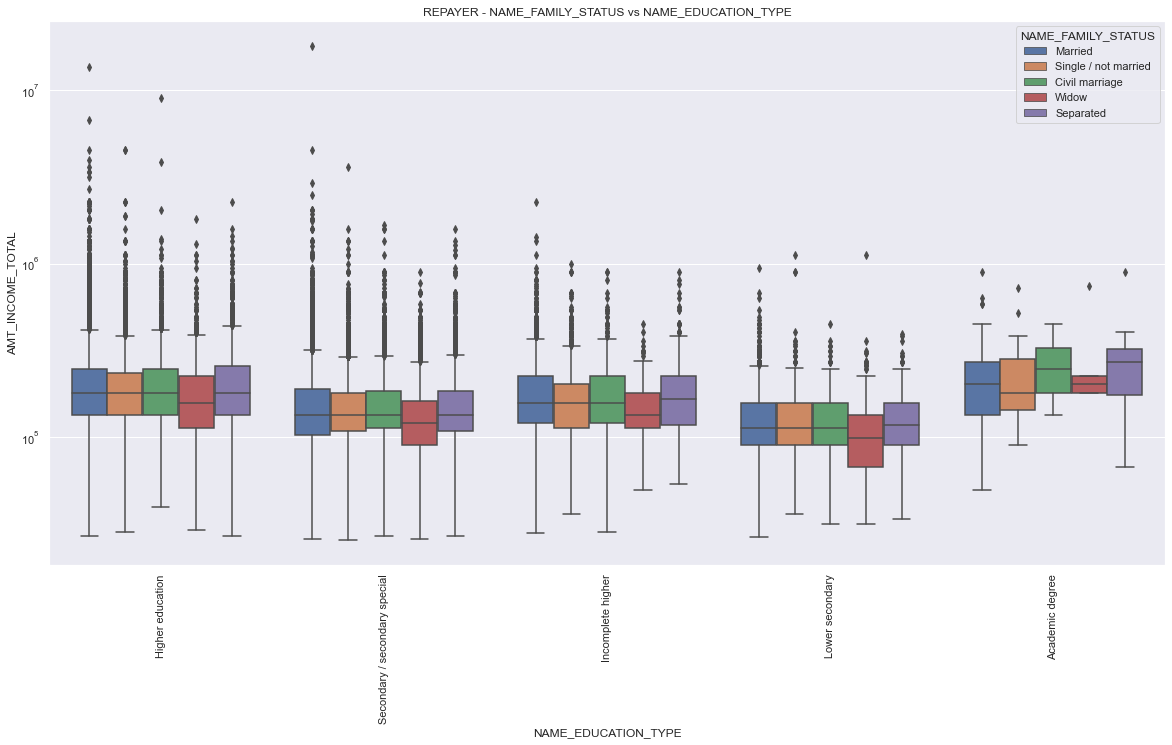

In [208]:
#NAME_EDUCATION_TYPE vs NAME_FAMILY_STATUS vs AMT_INCOME_TOTAL
plt.xticks(rotation=90)
sns.boxplot(data =repayer_adDF, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('REPAYER - NAME_FAMILY_STATUS vs NAME_EDUCATION_TYPE')
plt.yscale('log')
plt.show()

**Inference : Well educated people are good repayers. Well educated people have higher incomes**


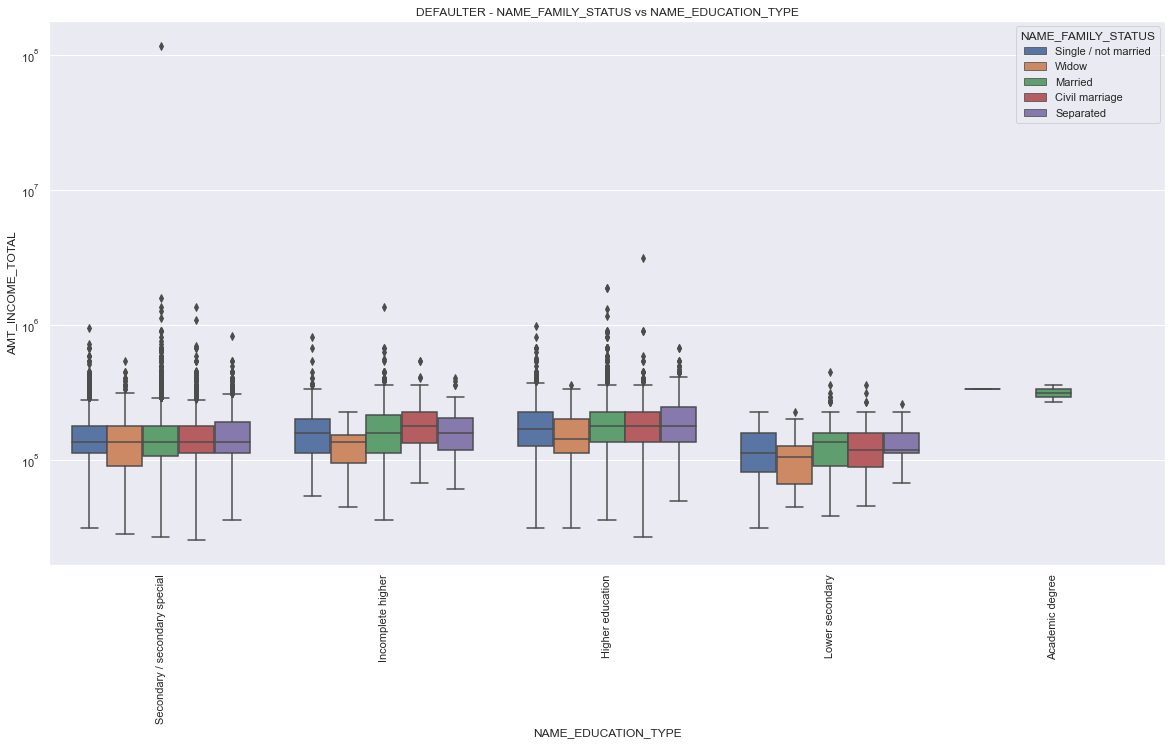

In [209]:
#NAME_EDUCATION_TYPE vs NAME_FAMILY_STATUS vs AMT_INCOME_TOTAL
plt.xticks(rotation=90)
sns.boxplot(data =defaulter_adDF, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('DEFAULTER - NAME_FAMILY_STATUS vs NAME_EDUCATION_TYPE')
plt.yscale('log')
plt.show()

**Inference : Degree of education is less among defauletrs**

-----

### 13. Merging Application Data and Previous Application DF's

In [210]:
#Merging the dataframes into a new DF called 'mergeDF'
mergeDF = pd.merge(adDF,paDF,how='inner',on='SK_ID_CURR')

In [211]:
# Shape and Size - inner
print('Merged DF Shape : ',mergeDF.shape)
print('Merged DF Size  : ',mergeDF.size)

Merged DF Shape :  (1412400, 64)
Merged DF Size  :  90393600


In [212]:
# Shape and Size - outer
print('Merged DF Shape : ',mergeDF.shape)
print('Merged DF Size  : ',mergeDF.size)

Merged DF Shape :  (1412400, 64)
Merged DF Size  :  90393600


In [213]:
# Shape and Size - right
print('Merged DF Shape : ',mergeDF.shape)
print('Merged DF Size  : ',mergeDF.size)

Merged DF Shape :  (1412400, 64)
Merged DF Size  :  90393600


In [214]:
# Shape and Size - left
print('Merged DF Shape : ',mergeDF.shape)
print('Merged DF Size  : ',mergeDF.size)

Merged DF Shape :  (1412400, 64)
Merged DF Size  :  90393600


In [215]:
#Merged DF Info
mergeDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412400 entries, 0 to 1412399
Data columns (total 64 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1412400 non-null  int64   
 1   TARGET                        1412400 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1412400 non-null  object  
 3   CODE_GENDER                   1412400 non-null  object  
 4   FLAG_OWN_CAR                  1412400 non-null  object  
 5   FLAG_OWN_REALTY               1412400 non-null  object  
 6   CNT_CHILDREN                  1412400 non-null  int64   
 7   AMT_INCOME_TOTAL              1412400 non-null  float64 
 8   AMT_CREDIT_x                  1412400 non-null  float64 
 9   AMT_ANNUITY_x                 1412400 non-null  float64 
 10  AMT_GOODS_PRICE_x             1412400 non-null  float64 
 11  NAME_INCOME_TYPE              1412400 non-null  object  
 12  NAME_EDUCATION

In [216]:
#Merged DF Describe
mergeDF.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK    SK_ID_PREV  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y  HOUR_APPR_PROCESS_START_y  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT
count  1.412400e+06  1.412400e+06  1.412400e+06      1.412400e+06  1.412400e+06   1.412400e+06       1.412400e+06                1.412400e+06  1.412400e+06   1.412400e+06       1.412400e+06     1.412400e+06     1.412400e+06          1.412400e+06                 1.412400e+06               1.412400e+06                1.412400e+06                1.412400e+06                 1.412400e+06            1.412400e+06            1.412400e+06             1.412400e+06              1.412400e+06              1.412400e+06            1.412400e+06                1.412400e+06               1.412400e+06                1.412400e+06  1.412400e+06   1.412400e+06     1.412400e+06  1.412399e+06       1.412400e+06               1.412400e+06   1.412400e+06      1.412400e+06  1.412400e+06
mean   2.784720e+05  8.654489e-02  4.048209e-01      1.733514e+05  5.878110e+05   2.702775e+04       5.277218e+05                2.075116e-02  4.472104e+01   1.992354e+02      -5.003381e+03    -3.034577e+03     2.150472e+00          2.059630e+00                 2.037581e+00               1.198410e+01                1.208086e-02                4.396630e-02                 3.604078e-02            7.357618e-02            2.220809e-01             1.740031e-01              1.537574e-01              1.078370e-01           -1.084677e+03                5.488530e-03               6.033702e-03                3.410578e-02  1.922744e+06   1.484083e+04     1.752563e+05  1.963448e+05       1.854527e+05               1.247882e+01  -8.804363e+02      3.149666e+02  1.517154e+01
std    1.028098e+05  2.811671e-01  7.172844e-01      1.986513e+05  3.849541e+05   1.395023e+04       3.532474e+05                1.334778e-02  1.190991e+01   3.929074e+02       3.551277e+03     1.507366e+03     9.006403e-01          4.957988e-01                 4.886617e-01               3.232191e+00                1.092470e-01                2.050202e-01                 1.863917e-01            2.610800e-01            4.156454e-01             3.791123e-01              4.655417e-01              3.787403e-01            8.000369e+02                7.705211e-02               1.002425e-01                2.013163e-01  5.327035e+05   1.316436e+04     2.936343e+05  3.194830e+05       2.881361e+05               3.331516e+00   7.836088e+02      7.698424e+03  1.299409e+01
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04  4.500000e+04   1.615500e+03       4.050000e+04                2.900000e-04  2.100000e+01   0.000000e+00      -2.467200e+04    -7.197000e+03     1.000000e+00          1.000000e+00                 1.000000e+00               0.000000e+00                0.000000e+00                0.000000e+00                 0.000000e+00            0.000000e+00            0.000000e+00             0.000000e+00              0.000000e+00              0.000000e+00           -4.292000e+03                0.000000e+00               0.000000e+00                0.000000e+00  1.000001e+06   0.000000e+00     0.000000e+00  0.000000e+00       0.000000e+00               0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00
25%    1.893680e+05  0.000000e+00  0.000000e+00      1.125000e+05  2.700000e+05   1.683000e+04       2.385000e+05                1.003200e-02  3.5000

In [217]:
#Segregatting the mergeDF for Repayer and Defaulter for better Analysis

mergeDF_Repayer = mergeDF[mergeDF['TARGET']==0]
mergeDF_Defaulter = mergeDF[mergeDF['TARGET']==1]

In [218]:
#NAME_CLIENT_TYPE vs NAME_CONTRACT_STATUS vs TARGET
client_Contract = pd.pivot_table(mergeDF, values='TARGET', index=['NAME_CLIENT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)

In [219]:
client_Contract

NAME_CONTRACT_STATUS  Approved  Canceled   Refused  Unused offer
NAME_CLIENT_TYPE                                                
New                   0.088224  0.145455  0.111048      0.089496
Refreshed             0.065145  0.081118  0.117506      0.074456
Repeater              0.072146  0.091769  0.120526      0.083419
XNA                   0.071594  0.101377  0.135714      0.103448

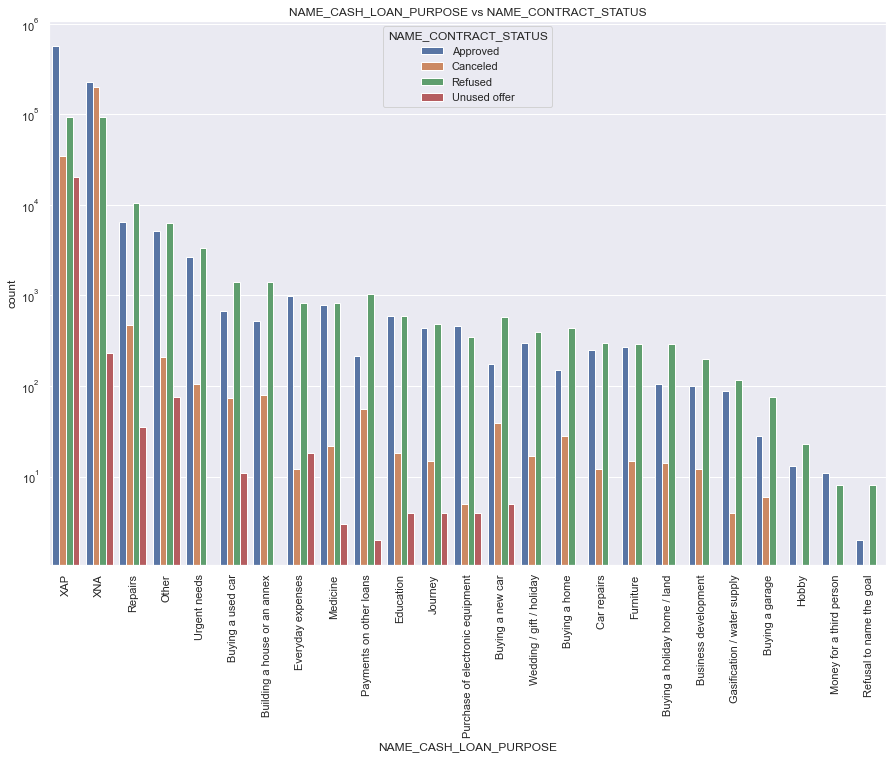

In [220]:
#Repayer - NAME_CASH_LOAN_PURPOSE vs NAME_CONTRACT_STATUS
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('NAME_CASH_LOAN_PURPOSE vs NAME_CONTRACT_STATUS')
ax = sns.countplot(data = mergeDF_Repayer, x= 'NAME_CASH_LOAN_PURPOSE', 
                   order=mergeDF['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
plt.show()

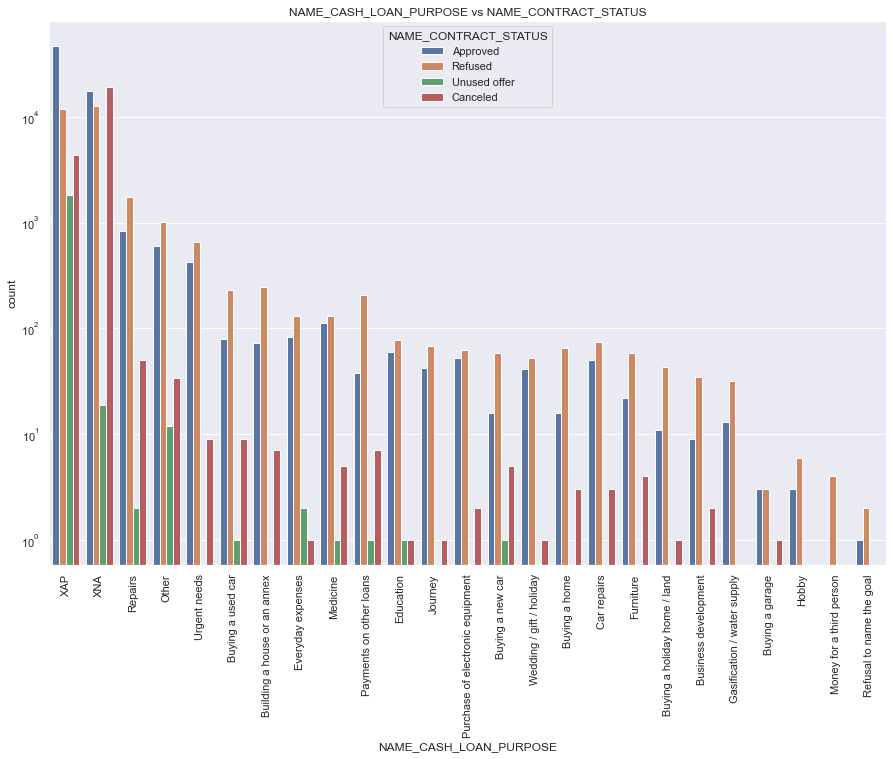

In [221]:
#Defaulter - NAME_CASH_LOAN_PURPOSE vs NAME_CONTRACT_STATUS
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('NAME_CASH_LOAN_PURPOSE vs NAME_CONTRACT_STATUS')
ax = sns.countplot(data = mergeDF_Defaulter, x= 'NAME_CASH_LOAN_PURPOSE', 
                   order=mergeDF['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
plt.show()

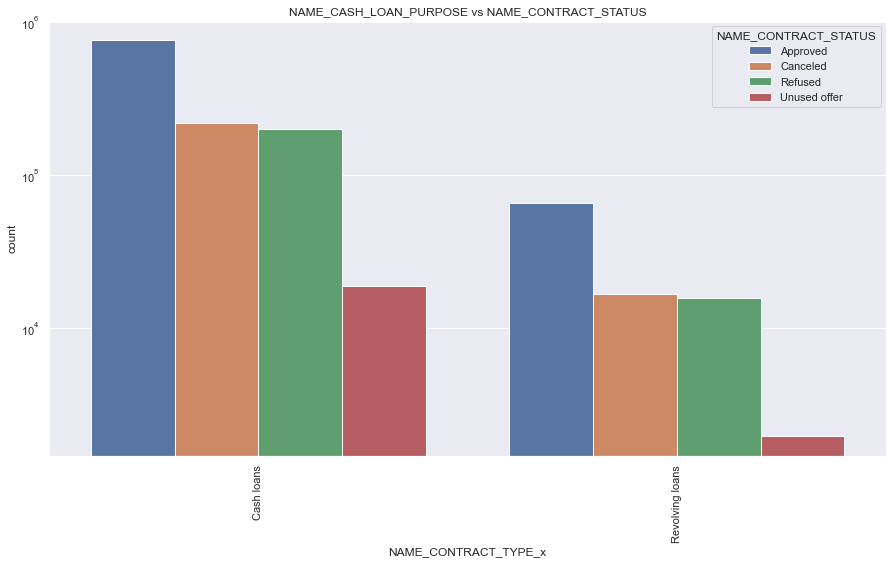

In [222]:
#Repayer - NAME_CONTRACT_TYPE vs NAME_CONTRACT_STATUS
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('NAME_CASH_LOAN_PURPOSE vs NAME_CONTRACT_STATUS')
ax = sns.countplot(data = mergeDF_Repayer, x= 'NAME_CONTRACT_TYPE_x', 
                   order=mergeDF['NAME_CONTRACT_TYPE_x'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
plt.show()

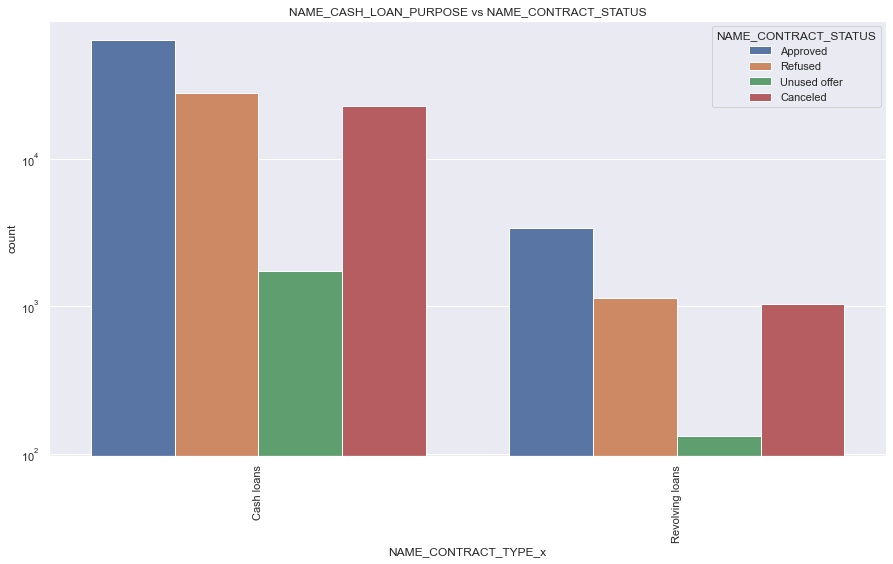

In [223]:
#Defaulter - NAME_CONTRACT_TYPE vs NAME_CONTRACT_STATUS
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('NAME_CASH_LOAN_PURPOSE vs NAME_CONTRACT_STATUS')
ax = sns.countplot(data = mergeDF_Defaulter, x= 'NAME_CONTRACT_TYPE_x', 
                   order=mergeDF['NAME_CONTRACT_TYPE_x'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
plt.show()

----

## 14. Top 10 Correlations

In [224]:
# Top 10 Correlations for Target = 1
a = defaulter_adDF.corr().unstack().sort_values().drop_duplicates()

In [225]:
print("Top 10 correlations for Target = 1 are:\n\n",a[-12:-2])

Top 10 correlations for Target = 1 are:

 REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_WORK_REGION    0.497925
DAYS_EMPLOYED                DAYS_BIRTH                    0.581859
AMT_CREDIT                   AMT_ANNUITY                   0.751957
AMT_GOODS_PRICE              AMT_ANNUITY                   0.752699
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.778412
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.847879
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.868828
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.885506
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.956625
AMT_GOODS_PRICE              AMT_CREDIT                    0.983103
dtype: float64


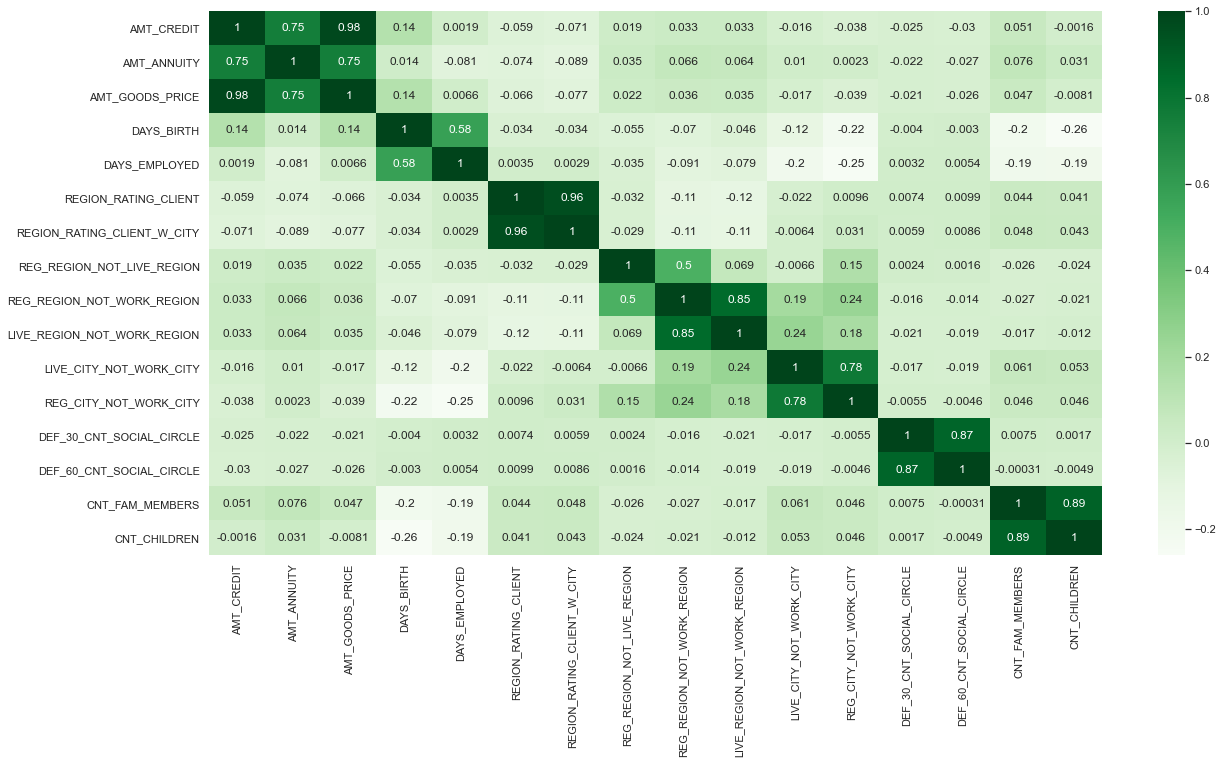

In [226]:
# These are the top 10 colrrelations for defaulter_adDF dataframe (where TARGET = 1) as per our analysis
sns.heatmap(defaulter_adDF[["AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE", "DAYS_BIRTH", "DAYS_EMPLOYED", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "LIVE_CITY_NOT_WORK_CITY", "REG_CITY_NOT_WORK_CITY", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "CNT_FAM_MEMBERS", "CNT_CHILDREN"]].corr(), cmap = "Greens", annot = True)
plt.show()

In [227]:
# Top 10 Correlations for Target = 0
b = repayer_adDF.corr().unstack().sort_values().drop_duplicates()

In [228]:
print("Top 10 correlations for Target = 0 are:\n\n",b[-12:-2])

Top 10 correlations for Target = 0 are:

 REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION    0.446301
DAYS_EMPLOYED                DAYS_BIRTH                    0.625857
AMT_ANNUITY                  AMT_CREDIT                    0.771114
AMT_GOODS_PRICE              AMT_ANNUITY                   0.776686
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.830377
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.859355
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.861719
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.878567
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.950124
AMT_CREDIT                   AMT_GOODS_PRICE               0.987251
dtype: float64


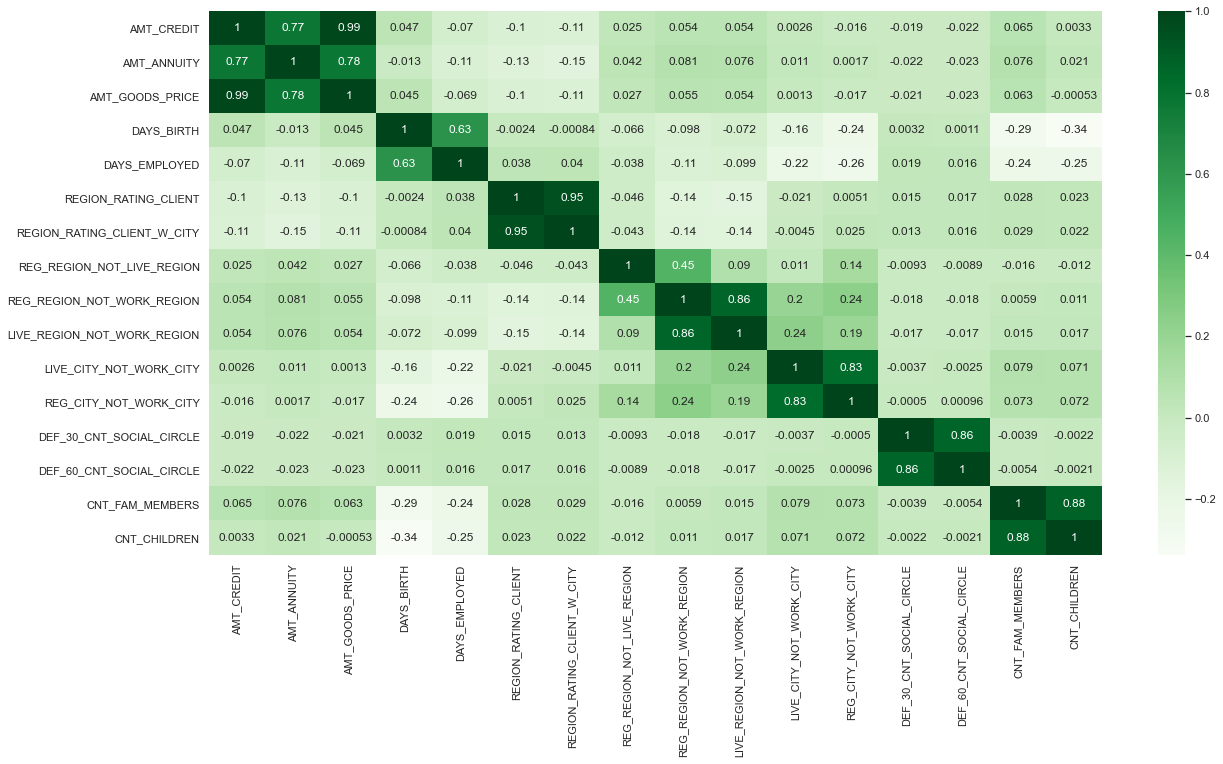

In [229]:
# These are the top 10 colrrelations for repayer_adDF dataframe as per our analysis
sns.heatmap(repayer_adDF[["AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE", "DAYS_BIRTH", "DAYS_EMPLOYED", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "LIVE_CITY_NOT_WORK_CITY", "REG_CITY_NOT_WORK_CITY", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "CNT_FAM_MEMBERS", "CNT_CHILDREN"]].corr(), cmap = "Greens", annot = True)
plt.show()

**Top Inferences from our analysis :**<br>
<br>
**1. Generally people tend to have cash loans instead of revolving loans.**<br>
**2. Women are better repayers than men.**<br>
**3. Higher the underlying security value, higher is the associated loan and annuity for that loan.**<br>
**4. Though women are better repayers than men, the company should avoid giving loans to women in age group 30-40 who are on  
maternity leave.**<br>
**5. People living in rented apartments and separated people living in co-op apartments are at more risk of default.<br>**
**6. People who are less educated and have less than 5 years of work experience are at more risk of default.**<br>
**7. Company should avoid giving loan to less educated low skilled laborers.**<br>
**8. Businessmen and managers have good incomes and are good repayers. They can be offered better terms of loans like loan top-up or discounted interest rates.**<br>
**9. Company should avoid giving loans to people whose social surroundings have more instances of default.**<br>
**10. More the education, better is the income. Hence better is the repayment capacity.**

## Our analysis ends here. Thank You.

In [230]:
print("--- Credit EDA Case Study Execution Time : %s  ---" % (time.time() - start_time))

--- Credit EDA Case Study Execution Time : 645.3529839515686  ---
